**Data collection**


In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rushikeshmore09
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
telemetry = pd.read_csv("/content/microsoft-azure-predictive-maintenance/PdM_telemetry.csv")
maint = pd.read_csv("/content/microsoft-azure-predictive-maintenance/PdM_maint.csv")
failures = pd.read_csv("/content/microsoft-azure-predictive-maintenance/PdM_failures.csv")
machines = pd.read_csv("/content/microsoft-azure-predictive-maintenance/PdM_machines.csv")
errors = pd.read_csv("/content/microsoft-azure-predictive-maintenance/PdM_errors.csv")

**EDA**

In [ ]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [ ]:
telemetry.isnull().sum()

,0
datetime,0
machineID,0
volt,0
rotate,0
pressure,0
vibration,0


In [ ]:
telemetry.duplicated().sum()

np.int64(0)

In [ ]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
print("Total number of telemetry records: %d" % len(telemetry.index))
telemetry.describe()

Total number of telemetry records: 876100


,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


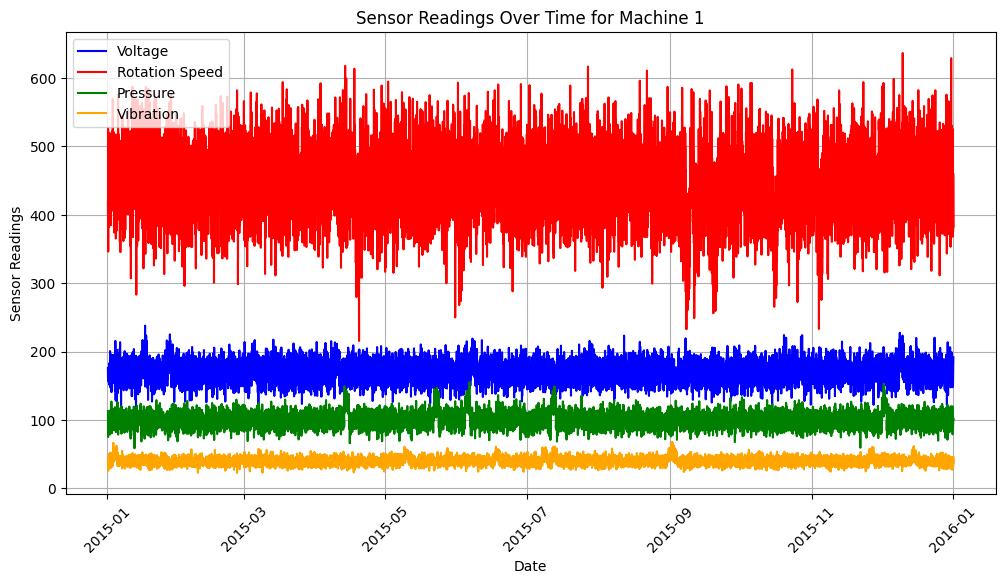

In [ ]:
machine_1 = telemetry[telemetry["machineID"] == 1]
# Plot time-series of sensor readings
plt.figure(figsize=(12, 6))
plt.plot(machine_1["datetime"], machine_1["volt"], label="Voltage", color="blue")
plt.plot(machine_1["datetime"], machine_1["rotate"], label="Rotation Speed", color="red")
plt.plot(machine_1["datetime"], machine_1["pressure"], label="Pressure", color="green")
plt.plot(machine_1["datetime"], machine_1["vibration"], label="Vibration", color="orange")
plt.xlabel("Date")
plt.ylabel("Sensor Readings")
plt.title("Sensor Readings Over Time for Machine 1")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

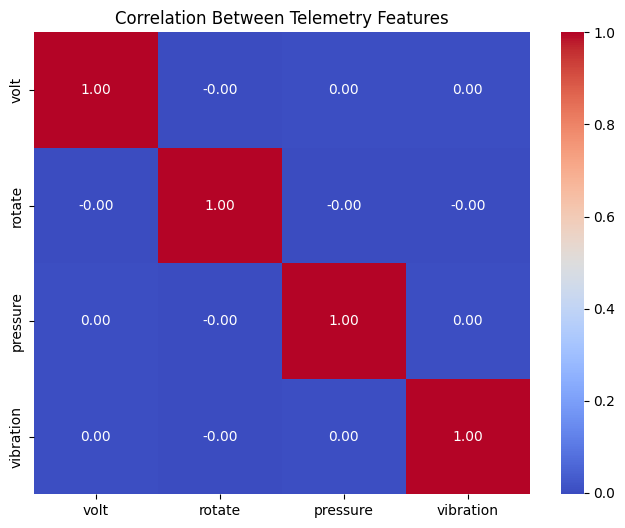

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(telemetry[['volt', 'rotate', 'pressure', 'vibration']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Telemetry Features")
plt.show()


In [ ]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
errors.isnull().sum()

,0
datetime,0
machineID,0
errorID,0


In [ ]:
errors.duplicated().sum()

np.int64(0)

In [ ]:
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

In [ ]:
print("Total number of error records: %d" % len(errors.index))
errors.describe()

Total number of error records: 3919


,datetime,machineID
count,3919,3919.000000
mean,2015-07-01 03:34:18.586374144,51.044654
min,2015-01-01 06:00:00,1.000000
25%,2015-03-31 05:00:00,25.000000
50%,2015-07-01 06:00:00,51.000000
75%,2015-10-01 15:00:00,77.000000
max,2016-01-01 05:00:00,100.000000
std,NaN,28.954988


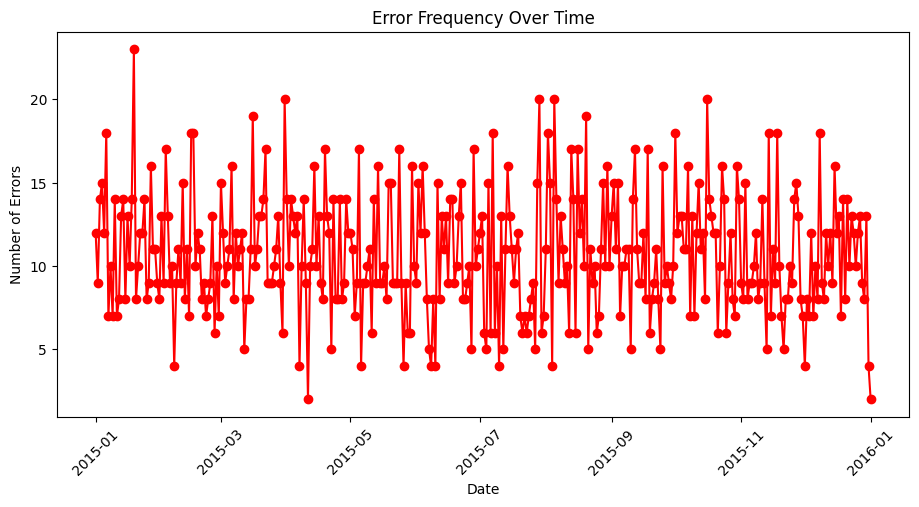

In [ ]:
plt.figure(figsize=(11, 5))
errors['date'] = errors['datetime'].dt.date
error_counts = errors.groupby('date').size()
error_counts.plot(kind='line', marker='o', color="red")
plt.xlabel("Date")
plt.ylabel("Number of Errors")
plt.title("Error Frequency Over Time")
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-0b74a1d12d26>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette="pastel")


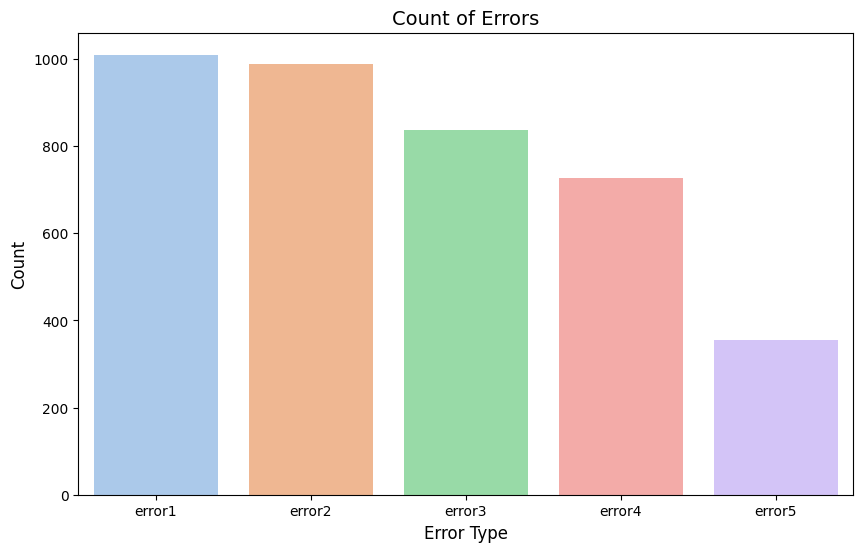

In [ ]:
# Count occurrences of each error type
error_counts = errors['errorID'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette="pastel")
plt.title("Count of Errors", fontsize=14)
plt.xlabel("Error Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
maint.isnull().sum()

,0
datetime,0
machineID,0
comp,0


In [ ]:
maint.duplicated().sum()

np.int64(0)

In [ ]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [ ]:
maint['datetime'] = pd.to_datetime(
    maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('object')

print("Total number of maintenance records: %d" % len(maint.index))
maint.describe()

Total number of maintenance records: 3286


,datetime,machineID
count,3286,3286.000000
mean,2015-05-30 14:40:36.518563840,50.284236
min,2014-06-01 06:00:00,1.000000
25%,2015-03-03 06:00:00,25.250000
50%,2015-06-13 06:00:00,50.000000
75%,2015-09-18 00:00:00,75.000000
max,2016-01-01 06:00:00,100.000000
std,NaN,28.914478


<ipython-input-25-406f5bcdcb5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="comp", data=maint, palette="Set2")


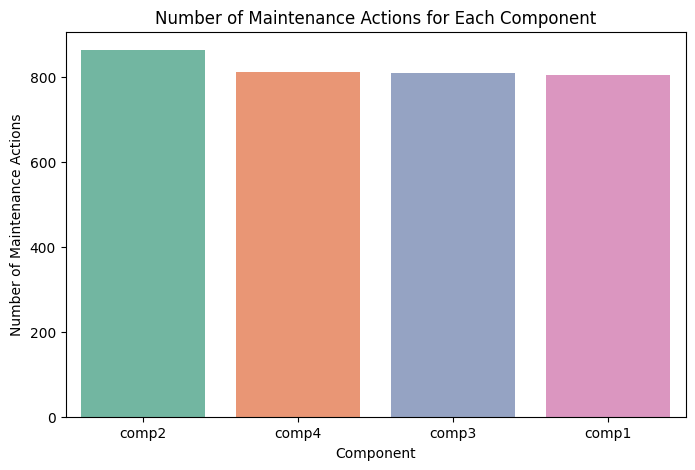

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="comp", data=maint, palette="Set2")
plt.xlabel("Component")
plt.ylabel("Number of Maintenance Actions")
plt.title("Number of Maintenance Actions for Each Component")
plt.show()

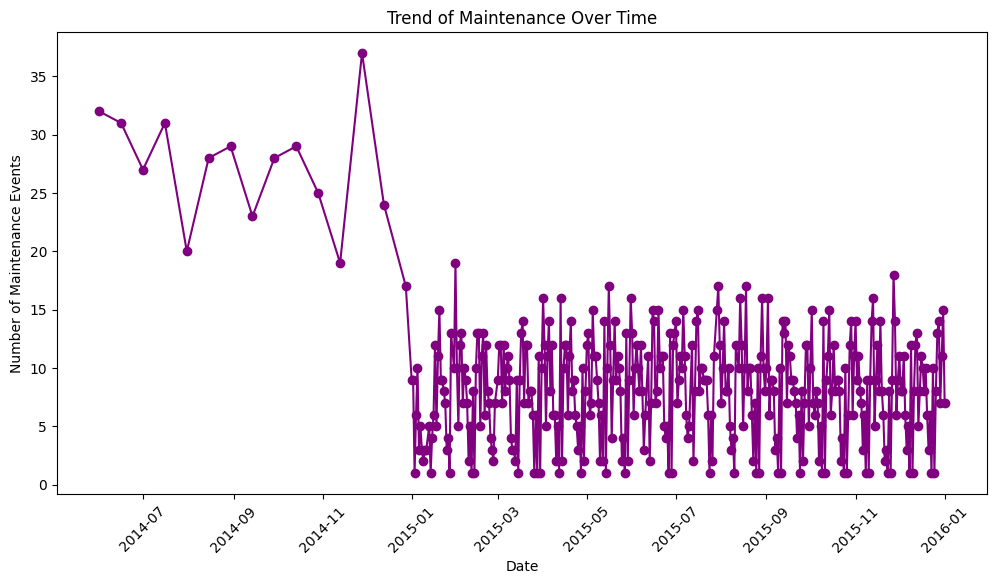

In [ ]:
plt.figure(figsize=(12, 6))
maint['date'] = maint['datetime'].dt.date
maint.groupby('date').size().plot(kind='line', marker='o', color="purple")
plt.xlabel("Date")
plt.ylabel("Number of Maintenance Events")
plt.title("Trend of Maintenance Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
machines.isnull().sum()

,0
machineID,0
model,0
age,0


In [ ]:
machines.duplicated().sum()

np.int64(0)

In [ ]:
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
machines['model'] = machines['model'].astype('object')

print("Total number of machines: %d" % len(machines.index))
machines.describe()

Total number of machines: 100


,machineID,age
count,100.000000,100.000000
mean,50.500000,11.330000
std,29.011492,5.856974
min,1.000000,0.000000
25%,25.750000,6.750000
50%,50.500000,12.000000
75%,75.250000,16.000000
max,100.000000,20.000000


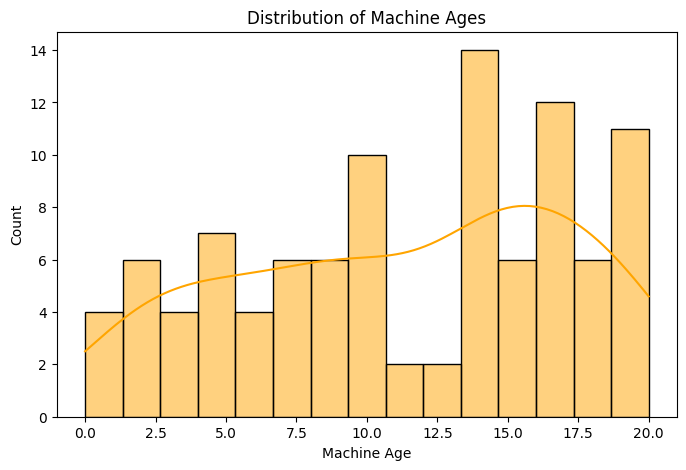

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(machines['age'], bins=15, kde=True, color="orange")
plt.xlabel("Machine Age")
plt.ylabel("Count")
plt.title("Distribution of Machine Ages")
plt.show()

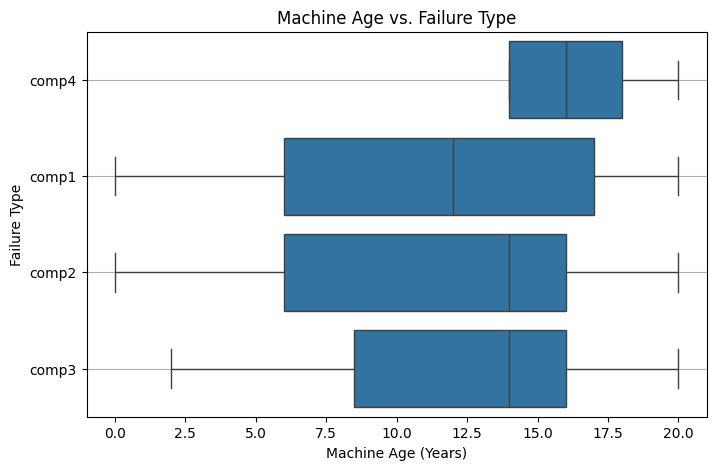

In [ ]:
failures_with_age = failures.merge(machines, on="machineID")
plt.figure(figsize=(8,5))
sns.boxplot(x=failures_with_age["age"], y=failures_with_age["failure"])
plt.xlabel("Machine Age (Years)")
plt.ylabel("Failure Type")
plt.title("Machine Age vs. Failure Type")
plt.grid(axis="y")
plt.show()

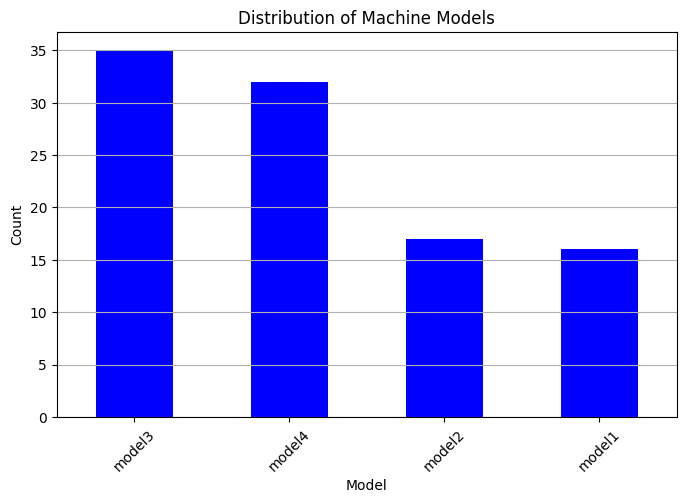

In [ ]:
model_counts = machines["model"].value_counts()
plt.figure(figsize=(8,5))
model_counts.plot(kind="bar", color="blue")
plt.xlabel("Model")
plt.ylabel("Count")
plt.title("Distribution of Machine Models")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [ ]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
failures.isnull().sum()

,0
datetime,0
machineID,0
failure,0


In [ ]:
failures.duplicated().sum()

np.int64(0)

In [ ]:
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

print("Total number of failures: %d" % len(failures.index))
failures.describe()

Total number of failures: 761


,datetime,machineID
count,761,761.000000
mean,2015-06-24 12:12:17.976346880,51.911958
min,2015-01-02 03:00:00,1.000000
25%,2015-03-23 06:00:00,24.000000
50%,2015-06-24 06:00:00,51.000000
75%,2015-09-23 06:00:00,79.000000
max,2015-12-31 06:00:00,100.000000
std,NaN,29.515542


In [ ]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   761 non-null    datetime64[ns]
 1   machineID  761 non-null    int64         
 2   failure    761 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.0+ KB


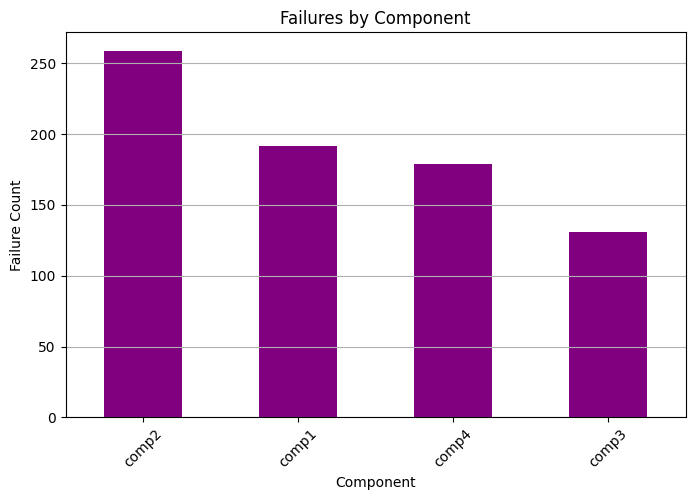

In [ ]:
failure_counts = failures["failure"].value_counts()

plt.figure(figsize=(8,5))
failure_counts.plot(kind="bar", color="purple")
plt.xlabel("Component")
plt.ylabel("Failure Count")
plt.title("Failures by Component")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

**Failure Detection**

**Feature Engineering**

In [ ]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


temp = []

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

<ipython-input-41-00e41a113afc>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H', closed='left', label='right').mean().unstack())
<ipython-input-41-00e41a113afc>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H', closed='left', label='right').mean().unstack())
<ipython-input-41-00e41a113afc>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H', closed='left', label='right').mean().unstack())
<ipython-input-41-00e41a113afc>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H', closed='left', label='right').mean().unstack())
<ipython-input-41-00e41a113afc>:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [ ]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).resample('3H',closed='left',
                                                                                label='right',
                                                                                ).first().unstack().rolling(window=24, center=False).mean())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).std())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)

<ipython-input-42-40022becf804>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',closed='left',
<ipython-input-42-40022becf804>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',closed='left',
<ipython-input-42-40022becf804>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',closed='left',
<ipython-input-42-40022becf804>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',closed='left',
<ipython-input-42-40022becf804>:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',
<ipython-input-42-40022becf804>:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [ ]:
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291977.000000,291977,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000
mean,50.503899,2015-07-02 19:50:32.314188800,170.777344,446.605536,100.858665,40.384696,13.299177,44.456698,8.885976,4.441105,170.738342,446.622451,100.871860,40.382356,15.055923,50.680485,10.330242,5.103534
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,156.713608,310.118604,91.162625,35.800869,6.178154,18.363177,4.275651,2.108104
25%,26.000000,2015-04-02 15:00:00,164.449518,427.559989,96.238713,38.147732,8.027807,26.903727,5.370694,2.684653,168.100594,440.859663,98.730139,39.379127,13.409911,44.992826,8.984156,4.488631
50%,51.000000,2015-07-02 21:00:00,170.434250,448.382424,100.234309,40.145805,12.495649,41.794255,8.346061,4.173937,170.285725,448.772454,100.195972,40.107229,14.942428,50.156537,10.009680,5.008386
75%,76.000000,2015-10-02 03:00:00,176.612207,468.448273,104.406729,42.227512,17.688547,59.105539,11.790367,5.899868,172.609273,456.129192,101.780484,40.908734,16.556760,55.657662,11.199380,5.589524
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,206.333895,491.081522,138.291979,55.266429,30.806053,117.198342,30.665847,12.757609
std,28.863913,NaN,9.501061,33.130486,7.414592,3.478391,6.966005,23.217195,4.656154,2.320281,4.178951,15.686284,3.983127,1.764322,2.383652,8.368899,2.129642,0.921640


In [ ]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
23,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,101.652072,44.017022,13.716658,41.767447,11.754808,6.878286
24,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,101.011726,44.148324,13.741098,41.038218,11.521602,6.929500
25,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,101.172241,44.672216,13.915181,33.879652,11.667258,7.162152
26,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,100.708151,44.993232,13.583969,33.790685,11.447426,7.244618
27,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,99.826551,45.160570,13.590129,33.787875,11.919716,7.167877


In [ ]:
# Convert categorical 'errorID' into binary columns
error_count = pd.get_dummies(errors, columns=['errorID'])

# Ensure 'datetime' and 'machineID' are retained
error_count = error_count.set_index(['datetime', 'machineID']).reset_index()

# Fill missing values with 0 (if necessary)
error_count = error_count.fillna(0)

error_count = error_count.drop(columns=['date'])

# Display result
error_count.head()

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False


In [ ]:
error_count.columns = ['datetime', 'machineID','error1', 'error2', 'error3', 'error4', 'error5']
error_count.head(10)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False
5,2015-01-25 15:00:00,1,False,False,False,True,False
6,2015-01-27 04:00:00,1,True,False,False,False,False
7,2015-03-03 22:00:00,1,False,True,False,False,False
8,2015-03-05 06:00:00,1,True,False,False,False,False
9,2015-03-20 18:00:00,1,True,False,False,False,False


In [ ]:
error_count.describe()

,datetime,machineID
count,3919,3919.000000
mean,2015-07-01 03:34:18.586374144,51.044654
min,2015-01-01 06:00:00,1.000000
25%,2015-03-31 05:00:00,25.000000
50%,2015-07-01 06:00:00,51.000000
75%,2015-10-01 15:00:00,77.000000
max,2016-01-01 05:00:00,100.000000
std,NaN,28.954988


In [ ]:
error_count = telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)

In [ ]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

<ipython-input-49-8815c654d97b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',
<ipython-input-49-8815c654d97b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',
<ipython-input-49-8815c654d97b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',
<ipython-input-49-8815c654d97b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',
<ipython-input-49-8815c654d97b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  values=col).resample('3H',


,machineID,datetime,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,2015-07-02 21:20:32.317505280,0.037483,0.029266,0.025117,0.025541,0.018666
min,1.000000,2015-01-01 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2015-07-02 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,2015-10-02 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016-01-01 09:00:00,2.000000,2.000000,1.500000,3.000000,2.000000
std,28.863914,NaN,0.192195,0.154875,0.140627,0.158549,0.134294


In [ ]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Convert categorical component replacement data into dummy variables
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()

# Keep only the first 6 columns (datetime, machineID, and components)
comp_rep = comp_rep.iloc[:, :6]

# Rename the columns explicitly
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# Merge with telemetry data to include all timestamps and machine IDs
comp_rep = telemetry[['datetime', 'machineID']].merge(
    comp_rep, on=['datetime', 'machineID'], how='outer'
).fillna(0).sort_values(by=['machineID', 'datetime'])

# Ensure only the required columns remain
comp_rep = comp_rep[['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']]

# Display first few rows
print(comp_rep.head())

               datetime  machineID  comp1  comp2  comp3  comp4
0   2014-06-01 06:00:00          1  False   True  False  False
90  2014-07-16 06:00:00          1  False  False  False   True
121 2014-07-31 06:00:00          1  False  False   True  False
359 2014-12-13 06:00:00          1   True  False  False  False
400 2015-01-01 06:00:00          1      0      0      0      0


In [ ]:
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(),
                 comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

<ipython-input-52-edd9e2125f82>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
<ipython-input-52-edd9e2125f82>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
<ipython-input-52-edd9e2125f82>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
<ipython-input-52-edd9e2125f82>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=Fal

In [ ]:
for comp in components:
    comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")

comp_rep.describe()

<ipython-input-53-6f7b37178990>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
<ipython-input-53-6f7b37178990>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")


,datetime,machineID,comp1,comp2,comp3,comp4
count,876823,876823.000000,876823.000000,876823.000000,876823.000000,876823.000000
mean,2015-07-02 18:04:36.939815424,50.499106,53.517611,51.537350,52.722043,53.826833
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.000000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.000000,32.791667,29.666667,32.250000,32.500000
75%,2015-10-02 00:00:00,75.000000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866046,62.490219,59.271457,58.875826,59.704062


In [ ]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
400,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
502,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
602,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
702,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
802,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [ ]:
final_feat = telemetry_feat.merge(
    error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(
    comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18


In [ ]:
final_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292698.000000,292698,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,...,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000
mean,50.501268,2015-07-02 20:05:53.336203520,170.784219,446.575340,100.864117,40.386506,13.300159,44.453806,8.886790,4.441220,...,0.037758,0.029442,0.025289,0.025712,0.018841,53.444887,51.452085,52.640758,53.737431,11.329497
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,164.452628,427.534759,96.239740,38.147926,8.027559,26.903316,5.370347,2.684286,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000
50%,50.000000,2015-07-02 21:00:00,170.436600,448.367055,100.236344,40.146085,12.496284,41.792210,8.347255,4.173691,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.125000,32.375000,12.000000
75%,75.000000,2015-10-02 03:00:00,176.619220,468.434339,104.409335,42.228807,17.690501,59.099500,11.791536,5.900380,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.375000,67.250000,70.375000,16.000000
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,...,2.000000,2.000000,1.500000,3.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.863879,NaN,9.509413,33.161392,7.423015,3.481097,6.967073,23.216722,4.656677,2.320464,...,0.192877,0.155121,0.140891,0.159066,0.134849,62.477055,59.241774,58.860338,59.673951,5.827516


In [ ]:
labeled_features = final_feat.merge(
    failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(
    method='bfill', limit=7)
labeled_features = labeled_features.fillna('none')
labeled_features.head()

<ipython-input-57-2f4b1a168d96>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  labeled_features = labeled_features.fillna(


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4


In [ ]:
labeled_features.loc[labeled_features['failure'] == 'comp3'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
29646,11,2015-02-18 09:00:00,164.641375,451.324765,127.468570,42.425720,23.298455,86.710834,18.655078,4.381594,...,0.000000,1.000000,0.0,217.125,29.125,217.125,14.125,model2,6,comp3
29647,11,2015-02-18 12:00:00,165.940250,435.751527,117.211916,37.712432,10.316698,88.495520,6.923475,2.757357,...,0.000000,1.000000,0.0,217.250,29.250,217.250,14.250,model2,6,comp3
29648,11,2015-02-18 15:00:00,156.779833,507.034422,124.654950,35.062903,19.197508,80.517012,15.388342,5.086147,...,0.000000,1.000000,0.0,217.375,29.375,217.375,14.375,model2,6,comp3
29649,11,2015-02-18 18:00:00,168.714660,418.146263,118.715783,36.366959,10.050598,24.207229,3.870357,3.975151,...,0.000000,1.000000,0.0,217.500,29.500,217.500,14.500,model2,6,comp3
29650,11,2015-02-18 21:00:00,168.130810,467.878662,125.319189,38.613799,12.818937,66.020209,6.454902,3.276342,...,0.000000,1.000000,0.0,217.625,29.625,217.625,14.625,model2,6,comp3
29651,11,2015-02-19 00:00:00,164.168534,433.408790,126.243635,41.116258,14.962008,148.866027,8.637983,2.529821,...,0.000000,1.000000,0.0,217.750,29.750,217.750,14.750,model2,6,comp3
29652,11,2015-02-19 03:00:00,178.005939,453.938868,121.959034,43.810208,16.128121,18.008494,8.410331,5.486669,...,0.000000,1.000000,0.0,217.875,29.875,217.875,14.875,model2,6,comp3
29653,11,2015-02-19 06:00:00,165.465459,464.415063,128.042100,39.384570,11.778733,38.781999,2.006748,3.396513,...,0.000000,1.000000,0.0,218.000,30.000,0.000,15.000,model2,6,comp3
30134,11,2015-04-20 06:00:00,169.635406,365.037229,129.979516,43.509029,14.623872,47.813223,7.454828,3.965537,...,0.333333,0.333333,0.0,278.000,0.000,60.000,15.000,model2,6,comp3
30136,11,2015-04-20 06:00:00,169.635406,365.037229,129.979516,43.509029,14.623872,47.813223,7.454828,3.965537,...,0.333333,0.333333,0.0,278.000,0.000,0.000,15.000,model2,6,comp3


In [ ]:
# Convert failure column to binary (1 = failure, 0 = no failure)
labeled_features['failure'] = labeled_features['failure'].apply(lambda x: 0 if x == 'none' else 1)

# Verify the change
print(labeled_features['failure'].value_counts())  # Should show count of 0s and 1s


failure
0    286633
1      6148
Name: count, dtype: int64


In [ ]:
labeled_features.head(20)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1
5,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,0.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,1
6,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,1
7,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,1
8,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,23.000,218.000,158.000,0.000,model3,18,1
9,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,1


In [ ]:
labeled_features.iloc[65987]

,65987
machineID,23
datetime,2015-07-17 15:00:00
voltmean_3h,160.192689
rotatemean_3h,362.67642
pressuremean_3h,103.563121
vibrationmean_3h,37.537568
voltsd_3h,18.667538
rotatesd_3h,16.737936
pressuresd_3h,16.576456
vibrationsd_3h,3.328066


In [ ]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'failure'],
      dtype='object')

In [ ]:
labeled_features.shape

(292781, 30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Prepare the dataset
final_train_X = pd.get_dummies(labeled_features.drop(['datetime', 'machineID', 'failure'], axis=1))
final_train_y = labeled_features['failure']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final_train_X, final_train_y, test_size=0.2, random_state=42, stratify=final_train_y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (234224, 30)
Test set size: (58557, 30)


In [ ]:
print(final_train_X)

        voltmean_3h  rotatemean_3h  pressuremean_3h  vibrationmean_3h  \
0        186.092896     451.641253       107.989359         55.308074   
1        166.281848     453.787824       106.187582         51.990080   
2        175.412103     445.450581       100.887363         54.251534   
3        157.347716     451.882075       101.289380         48.602686   
4        176.450550     446.033068        84.521555         47.638836   
...             ...            ...              ...               ...   
292776   177.758754     458.391629       103.183160         46.846592   
292777   166.078945     424.431184        98.344409         30.907459   
292778   158.327984     504.056262       108.055441         40.109705   
292779   170.306956     438.653616       102.346227         47.481232   
292780   182.525427     435.932056        98.798172         42.757630   

        voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  voltmean_24h  \
0       13.489090    62.185045       5.11817

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
percentage = accuracy_score(y_test, y_pred)*100
print(percentage)

Accuracy: 0.9978994825554588
99.78994825554588


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57327
           1       1.00      0.90      0.95      1230

    accuracy                           1.00     58557
   macro avg       1.00      0.95      0.97     58557
weighted avg       1.00      1.00      1.00     58557



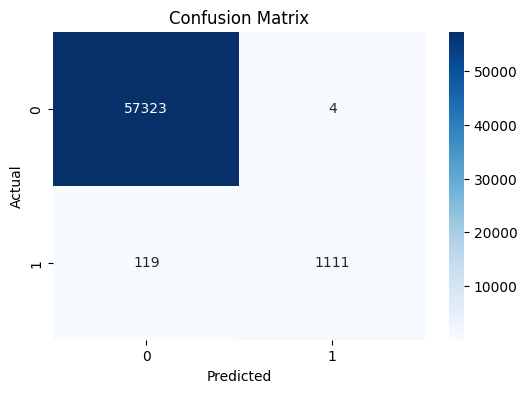

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-73-600bd7cdf91a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")


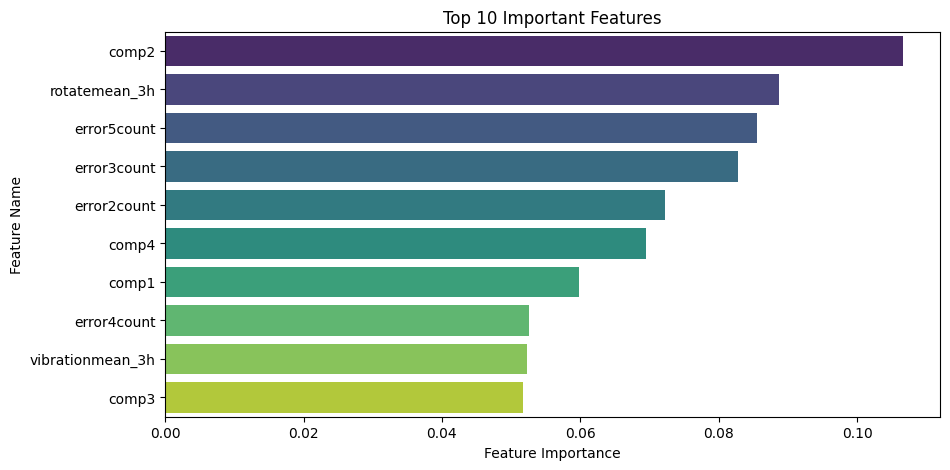

In [ ]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=final_train_X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features')
plt.show()


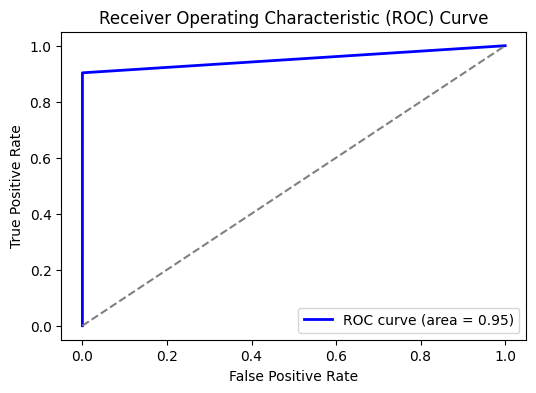

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:58:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
percentage = accuracy_score(y_test, y_pred)*100
print(percentage)

Accuracy: 0.9992827501408884
99.92827501408884


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57327
           1       0.98      0.98      0.98      1230

    accuracy                           1.00     58557
   macro avg       0.99      0.99      0.99     58557
weighted avg       1.00      1.00      1.00     58557



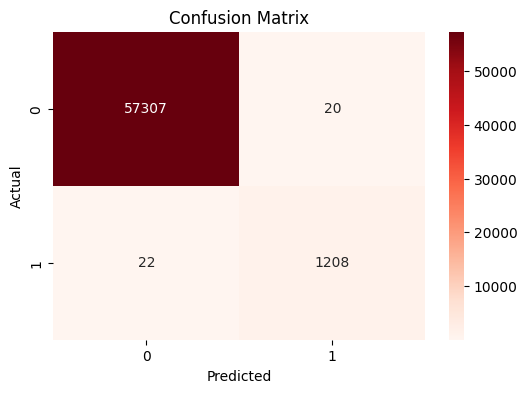

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

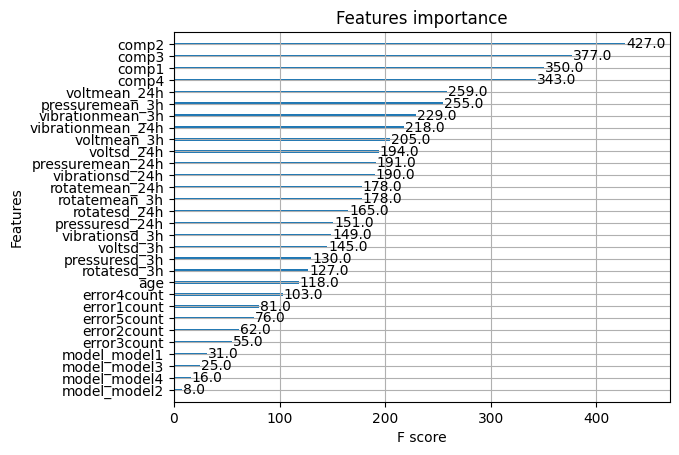

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type="weight", max_num_features=None)
plt.title("Features importance")
plt.show()

In [ ]:
# Sample input values with one-hot encoded models
sample_input = [
    175.2, 2860.5, 100.3, 4.5,  # voltmean_3h, rotatemean_3h, pressuremean_3h, vibrationmean_3h
    2.3, 10.5, 0.8, 0.2,        # voltsd_3h, rotatesd_3h, pressuresd_3h, vibrationsd_3h
    176.1, 2855.7, 101.1, 4.6,  # voltmean_24h, rotatemean_24h, pressuremean_24h, vibrationmean_24h
    2.5, 10.8, 0.9, 0.3,        # voltsd_24h, rotatesd_24h, pressuresd_24h, vibrationsd_24h
    0, 1, 0, 0, 1,              # error1count, error2count, error3count, error4count, error5count
    0, 0, 1, 0,                 # comp1, comp2, comp3, comp4 (One-hot encoded components)
    0, 1, 0, 0,                 # model_model1, model_model2, model_model3, model_model4 (One-hot encoded)
    12                           # age
]

# Feature names (should match training data order)
feature_names = [
    'voltmean_3h', 'rotatemean_3h', 'pressuremean_3h', 'vibrationmean_3h',
    'voltsd_3h', 'rotatesd_3h', 'pressuresd_3h', 'vibrationsd_3h',
    'voltmean_24h', 'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h',
    'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h',
    'error1count', 'error2count', 'error3count', 'error4count', 'error5count',
    'comp1', 'comp2', 'comp3', 'comp4',
    'model_model1', 'model_model2', 'model_model3', 'model_model4',
    'age'
]

# Convert input into a DataFrame
input_df = pd.DataFrame([sample_input], columns=feature_names)

# Ensure input matches training features
input_df = input_df[final_train_X.columns]  # Select only the columns used in training

# Make prediction using trained model
prediction = rf_model.predict(input_df)

# Output the prediction result
if prediction[0] == 1:
    print(" Failure is predicted ")
else:
    print("No failure detected.")



No failure detected.


In [ ]:
sample_input = {
    'voltmean_3h': 175.2, 'rotatemean_3h': 2860.5, 'pressuremean_3h': 100.3, 'vibrationmean_3h': 4.5,
    'voltsd_3h': 2.3, 'rotatesd_3h': 10.5, 'pressuresd_3h': 0.8, 'vibrationsd_3h': 0.2,
    'voltmean_24h': 176.1, 'rotatemean_24h': 2855.7, 'pressuremean_24h': 101.1, 'vibrationmean_24h': 4.6,
    'voltsd_24h': 2.5, 'rotatesd_24h': 10.8, 'pressuresd_24h': 0.9, 'vibrationsd_24h': 0.3,
    'error1count': 0, 'error2count': 1, 'error3count': 0, 'error4count': 0, 'error5count': 1,
    'comp1': 0, 'comp2': 0, 'comp3': 1, 'comp4': 0,
    'model_model1': 0, 'model_model2': 1, 'model_model3': 0, 'model_model4': 0,
    'age': 12
}
# Convert dictionary to DataFrame
input_df = pd.DataFrame([sample_input])

# Ensure it matches training features
input_df = input_df[final_train_X.columns]

# Make prediction using trained model
prediction = rf_model.predict(input_df)

# Output the prediction result
if prediction[0] == 1:
    print(" Failure is predicted ")
else:
    print("No failure detected.")


No failure detected.


In [ ]:
sample_input = {
    'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
    'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
    'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
    'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
    'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
    'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
    'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,  # One-hot encoded 'model'
    'age': 18
}
# Convert dictionary to DataFrame
input_df = pd.DataFrame([sample_input])

# Ensure it matches training features
input_df = input_df[final_train_X.columns]

# Make prediction using trained model
prediction = rf_model.predict(input_df)

# Output the prediction result
if prediction[0] == 1:
    print(" Failure is predicted ")
else:
    print("No failure detected.")

 Failure is predicted 


In [ ]:
sample_input = {
    'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
    'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
    'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
    'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
    'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
    'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
    'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,  # One-hot encoded 'model'
    'age': 18
}
# Convert dictionary to DataFrame
input_df = pd.DataFrame([sample_input])

# Ensure it matches training features
input_df = input_df[final_train_X.columns]

# Make prediction using trained model
prediction = xgb_model.predict(input_df)
print(prediction)

# Output the prediction result
if prediction[0] == 1:
    print(" Failure is predicted ")
else:
    print("No failure detected.")

[1]
 Failure is predicted 


## **Remaining useful life**

In [ ]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
maint.head()

,datetime,machineID,comp,date
0,2014-06-01 06:00:00,1,comp2,2014-06-01
1,2014-07-16 06:00:00,1,comp4,2014-07-16
2,2014-07-31 06:00:00,1,comp3,2014-07-31
3,2014-12-13 06:00:00,1,comp1,2014-12-13
4,2015-01-05 06:00:00,1,comp4,2015-01-05


In [ ]:
errors.head()

,datetime,machineID,errorID,date
0,2015-01-03 07:00:00,1,error1,2015-01-03
1,2015-01-03 20:00:00,1,error3,2015-01-03
2,2015-01-04 06:00:00,1,error5,2015-01-04
3,2015-01-10 15:00:00,1,error4,2015-01-10
4,2015-01-22 10:00:00,1,error4,2015-01-22


In [ ]:
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1


In [ ]:
labeled_features.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,failure
count,292781.000000,292781,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,...,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000,292781.000000
mean,50.499643,2015-07-02 20:03:32.312957184,170.787271,446.560386,100.867121,40.387897,13.300733,44.453475,8.886286,4.441372,...,0.029495,0.025344,0.025741,0.018905,53.446000,51.448176,52.638933,53.732825,11.330107,0.020999
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,164.453853,427.521029,96.240153,38.148068,8.027065,26.904896,5.369767,2.684233,...,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000,0.000000
50%,50.000000,2015-07-02 21:00:00,170.439319,448.355858,100.236940,40.146543,12.496550,41.791019,8.347115,4.173889,...,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.125000,32.375000,12.000000,0.000000
75%,75.000000,2015-10-02 00:00:00,176.622969,468.428701,104.410628,42.229995,17.691581,59.096708,11.790985,5.900852,...,0.000000,0.000000,0.000000,0.000000,68.625000,66.375000,67.250000,70.375000,16.000000,0.000000
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,...,2.000000,1.500000,3.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000,1.000000
std,28.864703,NaN,9.512748,33.177989,7.429184,3.482974,6.967946,23.216257,4.656639,2.320654,...,0.155154,0.140933,0.159091,0.134936,62.486588,59.241726,58.858078,59.673898,5.827340,0.143380


In [ ]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'failure'],
      dtype='object')

In [ ]:
dataset2 = labeled_features
dataset2.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1


In [ ]:
dataset2['datetime'] = pd.to_datetime(dataset2['datetime'])
dataset2.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1


In [ ]:
dataset2.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1


In [ ]:
# Merge machine metadata
telemetry = telemetry.merge(machines, on='machineID', how='left')

In [ ]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18


In [ ]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
print(telemetry.info())
print(failures.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   876100 non-null  datetime64[ns]
 1   machineID  876100 non-null  int64         
 2   volt       876100 non-null  float64       
 3   rotate     876100 non-null  float64       
 4   pressure   876100 non-null  float64       
 5   vibration  876100 non-null  float64       
 6   model      876100 non-null  object        
 7   age        876100 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 53.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   761 non-null    datetime64[ns]
 1   machineID  761 non-null    int64         
 2   failure    761 non-null   

In [ ]:
# Convert datetime columns
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])

# Sort datasets by machineID and datetime
telemetry = telemetry.sort_values(by=['machineID', 'datetime'])
failures = failures.sort_values(by=['machineID', 'datetime'])

# Ensure 'next_failure' column has correct datetime dtype
telemetry['next_failure'] = pd.NaT  # Ensures dtype is datetime64[ns]

# Compute next failure timestamp for each machine
for machine in telemetry['machineID'].unique():
    failure_times = failures[failures['machineID'] == machine]['datetime'].values
    machine_data = telemetry[telemetry['machineID'] == machine]

    if len(failure_times) == 0:  # No failure records for this machine
        telemetry.loc[machine_data.index, 'next_failure'] = pd.NaT
        continue  # Skip to next machine

    # Find the next failure time for each row using binary search
    next_failures = np.searchsorted(failure_times, machine_data['datetime'].values, side='right')

    # Ensure valid indices
    valid_indices = next_failures < len(failure_times)

    # Assign next failure timestamps safely
    telemetry.loc[machine_data.index, 'next_failure'] = pd.NaT  # Default to NaT
    telemetry.loc[machine_data.index[valid_indices], 'next_failure'] = failure_times[next_failures[valid_indices]]

# Compute RUL (Remaining Useful Life) in hours
telemetry['RUL'] = (telemetry['next_failure'] - telemetry['datetime']).dt.total_seconds() / 3600

# Assign large RUL for machines without upcoming failures
telemetry['RUL'] = telemetry['RUL'].fillna(5000)

# Drop unnecessary column
telemetry.drop(columns=['next_failure'], inplace=True)

# Display result
print(telemetry[['machineID', 'datetime', 'RUL']].head())

   machineID            datetime   RUL
0          1 2015-01-01 06:00:00  96.0
1          1 2015-01-01 07:00:00  95.0
2          1 2015-01-01 08:00:00  94.0
3          1 2015-01-01 09:00:00  93.0
4          1 2015-01-01 10:00:00  92.0


In [ ]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,RUL
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,96.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,95.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,94.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,93.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,92.0


In [ ]:
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,RUL
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,model4,5,5000.0
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,model4,5,5000.0
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,model4,5,5000.0
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,model4,5,5000.0
876099,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,model4,5,5000.0


In [ ]:
telemetry.shape

(876100, 9)

In [ ]:
dataset2.shape

(292781, 30)

In [ ]:
# Ensure telemetry has unique (machineID, datetime) rows
telemetry = telemetry[['machineID', 'datetime', 'RUL']].drop_duplicates()

# Merge dataset2 with telemetry while keeping only dataset2 rows
merged_data = dataset2.merge(
    telemetry,
    on=['machineID', 'datetime'],
    how='left'  # Ensures we only keep dataset2 rows
)

# Check if the shape is preserved
print("Expected Shape:", dataset2.shape)
print("Merged Dataset Shape:", merged_data.shape)

Expected Shape: (292781, 30)
Merged Dataset Shape: (292781, 31)


In [ ]:
merged_data.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure,RUL
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0,24.0
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1,21.0
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1,18.0
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1,15.0
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1,12.0


In [ ]:
merged_data.shape

(292781, 31)

In [ ]:
merged_data.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'failure', 'RUL'],
      dtype='object')

In [ ]:
merged_data.isnull().sum()

,0
machineID,0
datetime,0
voltmean_3h,0
rotatemean_3h,0
pressuremean_3h,0
vibrationmean_3h,0
voltsd_3h,0
rotatesd_3h,0
pressuresd_3h,0
vibrationsd_3h,0


In [ ]:
# Check the RUL distribution for failure = 0 and failure = 1
print("RUL stats for failure = 0 (Machines still running):")
print(merged_data[merged_data['failure'] == 0]['RUL'].describe())  # Should show high RUL values

print("\nRUL stats for failure = 1 (Failed Machines):")
print(merged_data[merged_data['failure'] == 1]['RUL'].describe())  # Should show low RUL values

RUL stats for failure = 0 (Machines still running):
count    286633.000000
mean       1503.719083
std        1667.798010
min          24.000000
25%         336.000000
50%         795.000000
75%        1788.000000
max        6477.000000
Name: RUL, dtype: float64

RUL stats for failure = 1 (Failed Machines):
count    6148.000000
mean      330.173227
std       966.229738
min         3.000000
25%         9.000000
50%        15.000000
75%        21.000000
max      6480.000000
Name: RUL, dtype: float64


In [ ]:
merged_data[merged_data['failure'] == 0].head(10)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure,RUL
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,0,24.0
10,1,2015-01-05 09:00:00,169.084809,463.433785,107.678774,41.710336,12.245544,61.759107,4.400233,9.750017,...,0.0,1.0,0.125,218.125,158.125,0.125,model3,18,0,1437.0
11,1,2015-01-05 12:00:00,165.518790,449.743255,110.377851,38.952082,23.170638,45.762142,14.009473,0.797364,...,0.0,1.0,0.250,218.250,158.250,0.250,model3,18,0,1434.0
12,1,2015-01-05 15:00:00,175.989642,419.863490,112.571146,41.514254,4.028327,20.148499,5.862629,9.702498,...,0.0,1.0,0.375,218.375,158.375,0.375,model3,18,0,1431.0
13,1,2015-01-05 18:00:00,188.576444,487.336742,88.967297,36.571052,8.278605,76.534023,11.892088,1.945849,...,0.0,1.0,0.500,218.500,158.500,0.500,model3,18,0,1428.0
14,1,2015-01-05 21:00:00,166.681364,481.685320,104.154110,38.662638,11.957697,25.052743,11.999161,4.804263,...,0.0,1.0,0.625,218.625,158.625,0.625,model3,18,0,1425.0
15,1,2015-01-06 00:00:00,167.430885,484.807784,102.232289,43.287968,23.443744,37.059140,6.851679,3.910358,...,0.0,1.0,0.750,218.750,158.750,0.750,model3,18,0,1422.0
16,1,2015-01-06 03:00:00,169.272600,481.957194,111.829518,40.241095,6.424745,18.336866,5.146151,6.644717,...,0.0,1.0,0.875,218.875,158.875,0.875,model3,18,0,1419.0
17,1,2015-01-06 06:00:00,168.593320,478.050656,97.806257,39.055169,9.664276,26.288220,9.614235,5.009606,...,0.0,1.0,1.000,219.000,159.000,1.000,model3,18,0,1416.0
18,1,2015-01-06 09:00:00,189.144341,446.751354,97.900405,39.627166,13.073243,12.650483,7.630746,2.814801,...,0.0,1.0,1.125,219.125,159.125,1.125,model3,18,0,1413.0


In [ ]:
merged_data[merged_data['failure'] == 1].head(10)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure,RUL
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1,21.0
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1,18.0
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1,15.0
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1,12.0
5,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,1,9.0
6,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,1,6.0
7,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,1,3.0
8,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,1.0,23.000,218.000,158.000,0.000,model3,18,1,1440.0
9,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,1,1440.0
484,1,2015-03-05 09:00:00,187.866142,419.978727,89.164859,39.214537,19.004215,51.227739,14.654356,6.046484,...,0.0,0.0,44.125,277.125,14.125,29.125,model3,18,1,21.0


In [ ]:
sns.set_style("whitegrid")

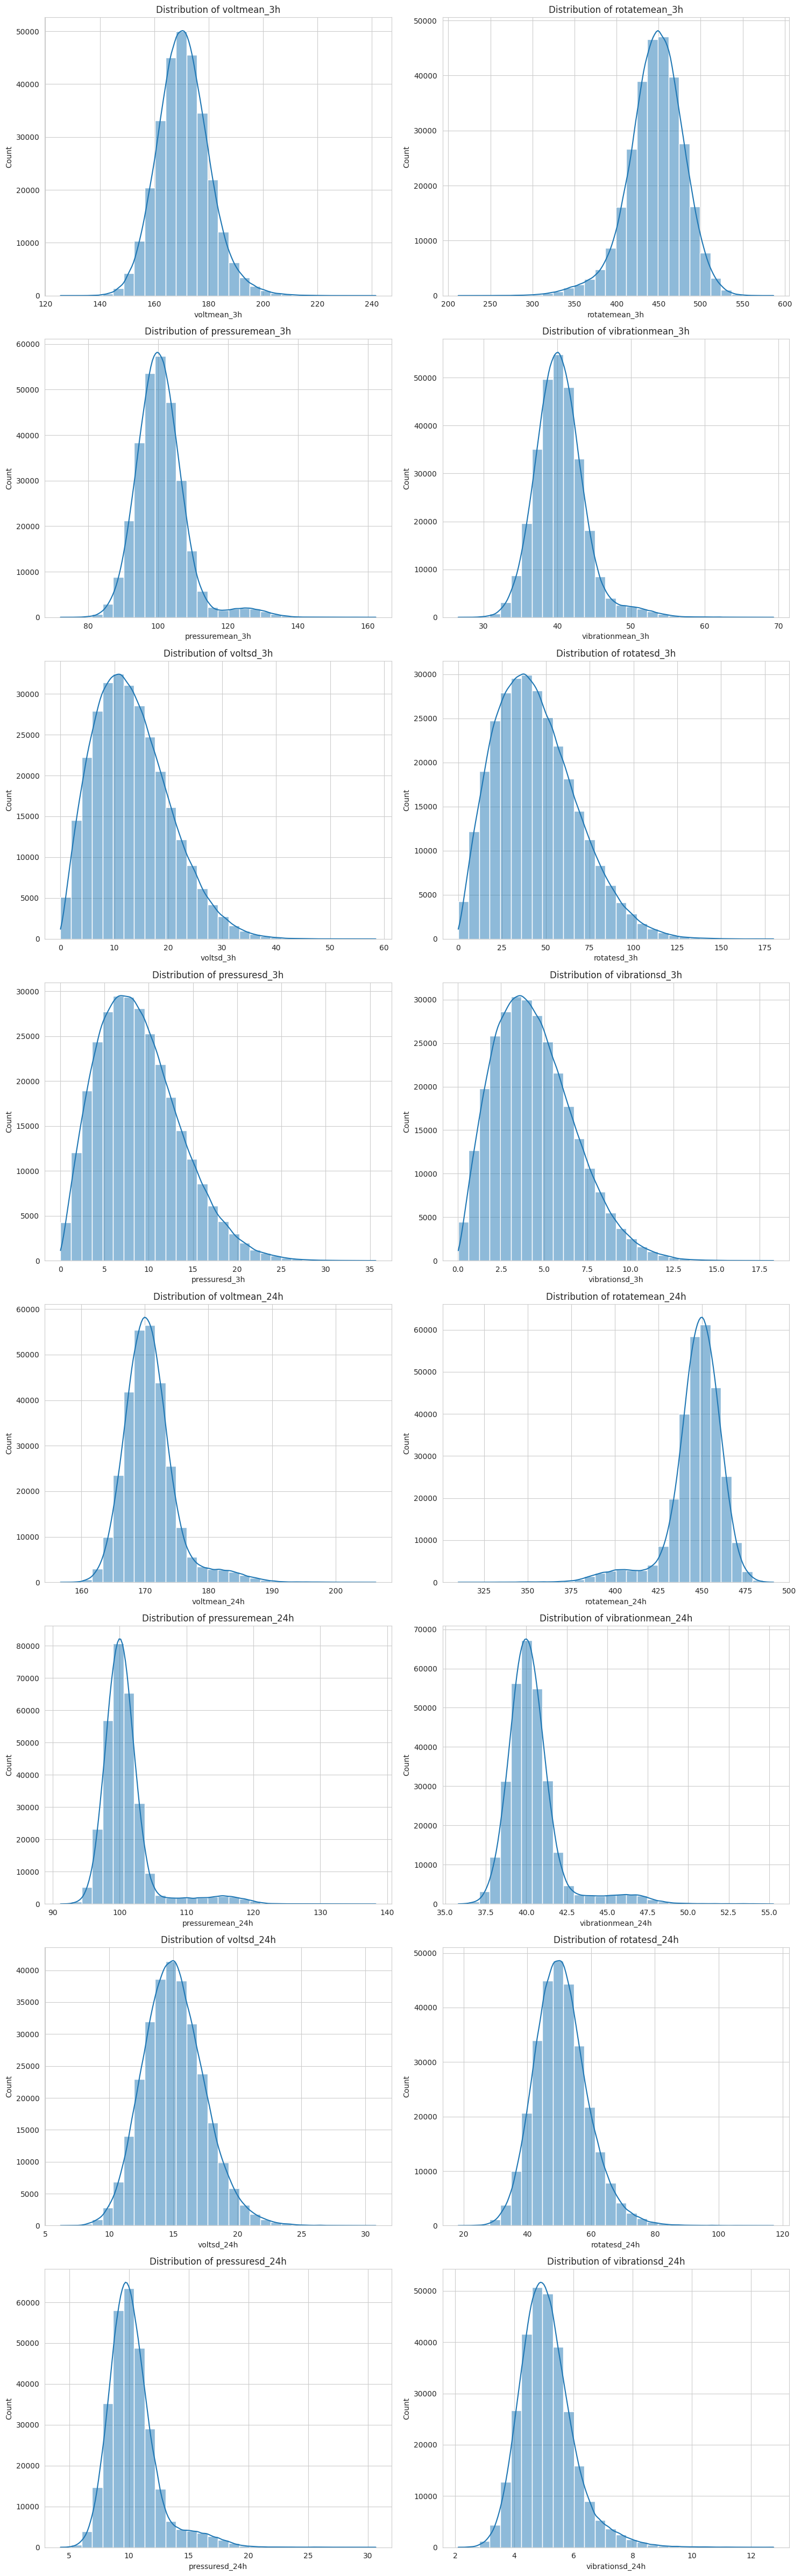

In [ ]:
# List of selected features
selected_features = [
    'voltmean_3h', 'rotatemean_3h', 'pressuremean_3h', 'vibrationmean_3h',
    'voltsd_3h', 'rotatesd_3h', 'pressuresd_3h', 'vibrationsd_3h',
    'voltmean_24h', 'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h',
    'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h'
]

# Set figure size dynamically based on number of features
plt.figure(figsize=(15, len(selected_features) * 3))

# Loop through features and create subplots
for i, feature in enumerate(selected_features):
    plt.subplot((len(selected_features) + 1) // 2, 2, i + 1)  # Arrange in 2 columns
    sns.histplot(merged_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

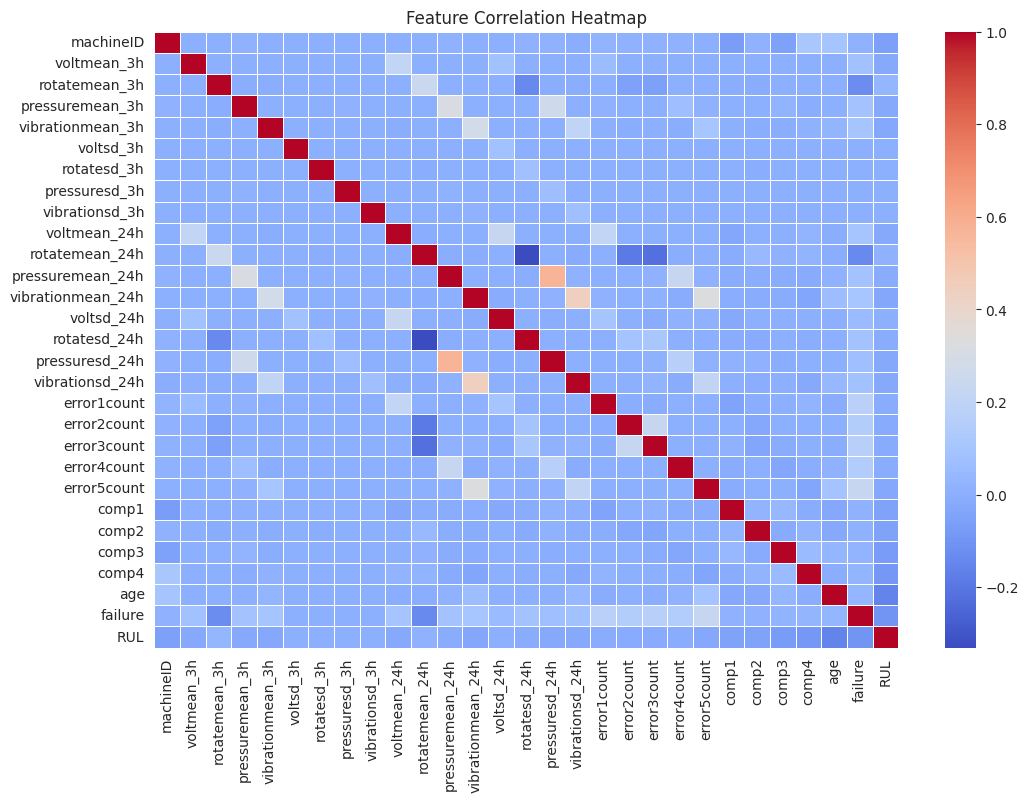

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data.corr(numeric_only=True) # Added numeric_only=True
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
print(merged_data['failure'].value_counts()) # Change telemetry to merged_data

failure
0    286633
1      6148
Name: count, dtype: int64


<ipython-input-117-7953de718c87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_data['failure'], palette=['blue', 'red'])


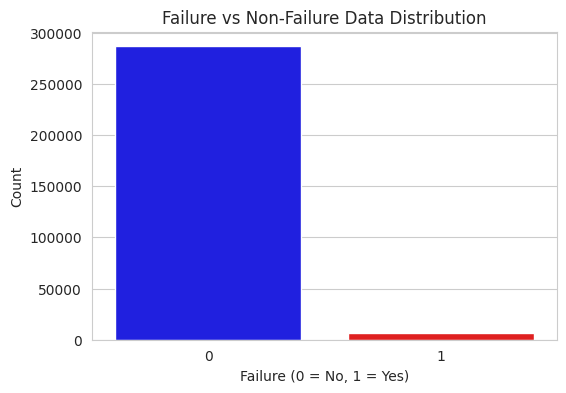

In [ ]:
# Countplot of failure vs non-failure
plt.figure(figsize=(6, 4))
sns.countplot(x=merged_data['failure'], palette=['blue', 'red'])
plt.title("Failure vs Non-Failure Data Distribution")
plt.xlabel("Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Filter the dataset to keep only failure cases
failure_data = merged_data[merged_data['failure'] == 1]

In [ ]:
failure_data.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure,RUL
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,1,21.0
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,1,18.0
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,1,15.0
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,1,12.0
5,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,1,9.0


In [ ]:
failure_data.tail()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure,RUL
292592,100,2015-12-08 18:00:00,161.428880,364.210760,97.942548,40.330020,8.041689,85.856704,19.412041,6.740658,...,0.0,0.0,59.500,134.500,59.500,29.500,model4,5,1,12.0
292593,100,2015-12-08 21:00:00,183.506618,386.979638,99.931028,46.660998,11.618471,98.345647,8.586423,1.587427,...,0.0,0.0,59.625,134.625,59.625,29.625,model4,5,1,9.0
292594,100,2015-12-09 00:00:00,162.820511,386.831327,102.789669,40.150510,13.801966,21.089670,17.333013,0.876369,...,0.0,0.0,59.750,134.750,59.750,29.750,model4,5,1,6.0
292595,100,2015-12-09 03:00:00,175.173794,363.692978,90.742619,37.031412,18.725810,38.242385,3.177682,2.772665,...,0.0,0.0,59.875,134.875,59.875,29.875,model4,5,1,3.0
292596,100,2015-12-09 06:00:00,171.152883,399.465333,105.307757,41.725996,10.885292,19.972654,12.500403,2.636677,...,0.0,0.0,60.000,0.000,60.000,30.000,model4,5,1,5000.0


In [ ]:
failure_data.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,failure,RUL
count,6148.000000,6148,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,...,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.0,6148.000000
mean,52.144763,2015-06-25 17:00:28.692257536,176.100700,418.213266,105.419037,42.759978,13.370164,44.498591,8.908848,4.449789,...,0.183068,0.182363,0.231186,57.879615,58.124248,61.473142,63.545848,12.539850,1.0,330.173227
min,1.000000,2015-01-01 09:00:00,140.084800,218.883091,79.105864,29.341345,0.343802,0.837983,0.115041,0.059650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.000000
25%,24.000000,2015-03-24 05:15:00,166.714580,379.426761,97.302036,38.783992,7.935201,27.355036,5.383631,2.674738,...,0.000000,0.000000,0.000000,14.875000,14.875000,14.875000,14.875000,8.000000,1.0,9.000000
50%,51.000000,2015-06-26 01:30:00,174.427130,425.602907,101.948899,41.321103,12.618218,42.026219,8.418517,4.142874,...,0.000000,0.000000,0.000000,44.250000,30.000000,44.375000,44.375000,14.000000,1.0,15.000000
75%,79.000000,2015-09-26 06:00:00,184.625733,456.633289,109.583094,46.591378,17.810982,58.915047,11.808270,5.969993,...,0.500000,0.000000,0.333333,74.625000,74.625000,74.875000,89.250000,17.000000,1.0,21.000000
max,100.000000,2016-01-01 06:00:00,228.679545,559.699084,161.674797,69.311324,50.245495,148.866027,30.054026,15.633060,...,1.500000,2.000000,2.000000,402.000000,322.875000,319.000000,394.875000,20.000000,1.0,6480.000000
std,29.372974,NaN,13.112706,49.257610,12.065932,5.557803,7.062501,22.962121,4.677661,2.325633,...,0.253400,0.381507,0.415069,57.682651,60.229514,61.286920,62.619292,5.708943,0.0,966.229738


In [ ]:
# Remove rows where RUL is greater than 5000
failure_data = failure_data[failure_data['RUL'] <= 4000]

# Reset index after filtering (optional)
failure_data.reset_index(drop=True, inplace=True)

# Verify the change
print(failure_data[['machineID', 'datetime', 'RUL']].head())


   machineID            datetime   RUL
0          1 2015-01-04 09:00:00  21.0
1          1 2015-01-04 12:00:00  18.0
2          1 2015-01-04 15:00:00  15.0
3          1 2015-01-04 18:00:00  12.0
4          1 2015-01-04 21:00:00   9.0


In [ ]:
failure_data['RUL'].describe()

,RUL
count,5958.000000
mean,180.476334
std,485.330917
min,3.000000
25%,9.000000
50%,15.000000
75%,21.000000
max,3960.000000


In [ ]:
failure_data.shape

(5958, 31)

In [ ]:
failure_data.iloc[18]

,18
machineID,1
datetime,2015-04-19 12:00:00
voltmean_3h,166.248251
rotatemean_3h,414.891433
pressuremean_3h,112.169814
vibrationmean_3h,40.834426
voltsd_3h,16.884054
rotatesd_3h,66.41053
pressuresd_3h,3.451425
vibrationsd_3h,4.680576


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select feature columns (excluding RUL and failure)
feature_cols = [col for col in failure_data.columns if col not in ['machineID', 'datetime', 'RUL', 'failure']]

# Define X (features) and y (target)
X = pd.get_dummies(failure_data[feature_cols])
y = failure_data['RUL']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and testing sets (80% train, 20% test)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(test_y)

1344     18.0
625      21.0
1433     21.0
2227      9.0
1544      9.0
        ...  
5008     12.0
5407     15.0
1173     12.0
3207    360.0
1657     12.0
Name: RUL, Length: 1192, dtype: float64


In [ ]:
# Initialize Random Forest Model
rf_model_rul = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model_rul.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
pred_y = rf_model_rul.predict(test_X)

In [ ]:
print(pred_y)

[  18.     21.     21.   ...   11.7  1015.2    12.06]


In [ ]:
# Calculate MAE and RMSE
mae = mean_absolute_error(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 64.51
Root Mean Squared Error (RMSE): 217.69


In [ ]:
sample_input = {
    'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
    'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
    'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
    'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
    'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
    'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
    'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,  # One-hot encoded 'model'
    'age': 18
}

# Convert input to DataFrame
input_df = pd.DataFrame([sample_input])
# Define numerical features (assuming these are the ones you want to scale)
numerical_features = ['voltmean_3h', 'rotatemean_3h', 'pressuremean_3h', 'vibrationmean_3h',
                      'voltsd_3h', 'rotatesd_3h', 'pressuresd_3h', 'vibrationsd_3h',
                      'voltmean_24h', 'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h',
                      'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h',
                      'error1count', 'error2count', 'error3count', 'error4count', 'error5count',
                      'comp1', 'comp2', 'comp3', 'comp4', 'age',
                      'model_model1', 'model_model2', 'model_model3', 'model_model4']


# Normalize input using the same scaler
input_df[numerical_features] = scaler.transform(input_df[numerical_features])

# Ensure the input matches the training features
input_df = input_df[train_X.columns]

# Predict RUL
predicted_rul = rf_model_rul.predict(input_df)

print(f"🚀 Predicted Remaining Useful Life (RUL): {predicted_rul[0]:.2f} hours")


🚀 Predicted Remaining Useful Life (RUL): 19.20 hours


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Compute evaluation metrics
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

# Print the evaluation metrics
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

📌 Mean Absolute Error (MAE): 64.51
📌 Mean Squared Error (MSE): 47387.70
📌 Root Mean Squared Error (RMSE): 217.69
📌 R² Score: 0.8246


In [ ]:
# Create a DataFrame for visualization
results_df = pd.DataFrame({'Actual RUL': test_y, 'Predicted RUL': pred_y})

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


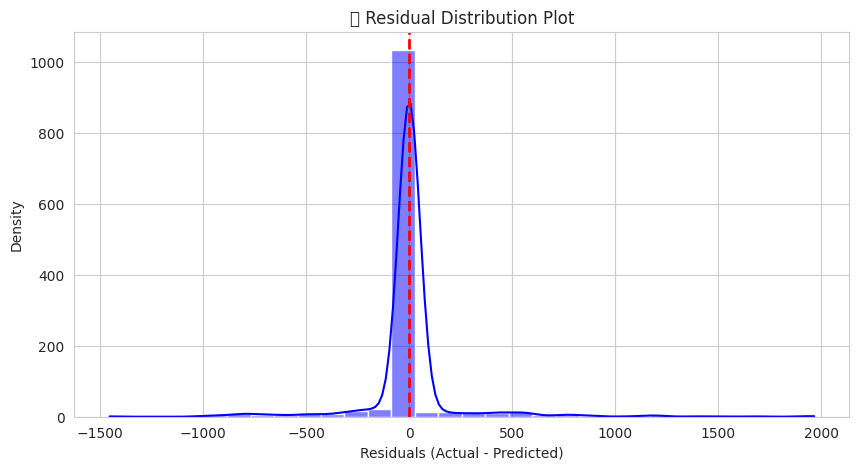

In [ ]:
# Residual Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(test_y - pred_y, kde=True, bins=30, color="blue")
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.title("📊 Residual Distribution Plot")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


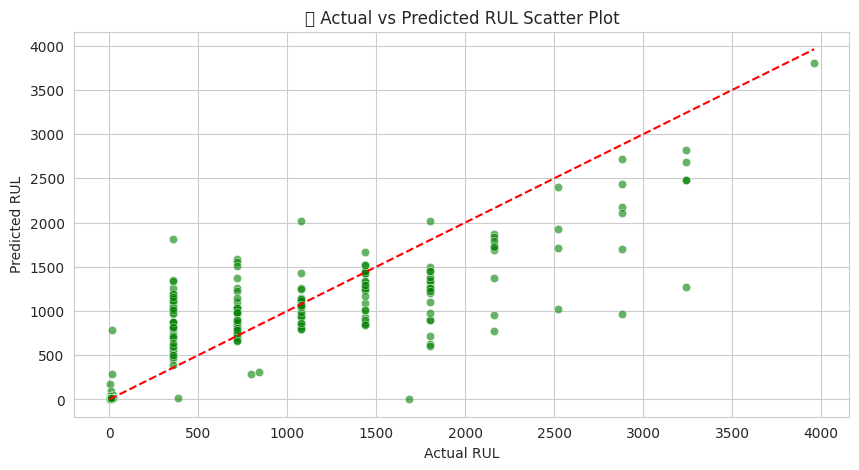

In [ ]:
# ✅ Scatter Plot: Actual vs Predicted RUL
plt.figure(figsize=(10, 5))
sns.scatterplot(x=test_y, y=pred_y, alpha=0.6, color="green")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')  # 45-degree line
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("📈 Actual vs Predicted RUL Scatter Plot")
plt.show()

In [ ]:
df2 = failure_data

# Example: Assuming your RUL data is in a pandas DataFrame called 'df'
percentile_85 = np.percentile(df2['RUL'], 85)  # Compute the 85th percentile

# Apply capping: Any RUL value greater than the 85th percentile is replaced
df2['RUL'] = np.where(df2['RUL'] > percentile_85,percentile_85, df2['RUL'])

# Check the new distribution
print(df2['RUL'].describe())


count    5958.000000
mean       67.246224
std       127.285897
min         3.000000
25%         9.000000
50%        15.000000
75%        21.000000
max       360.000000
Name: RUL, dtype: float64


In [ ]:
# Select feature columns (excluding RUL and failure)
feature_cols = [col for col in df2.columns if col not in ['machineID', 'datetime', 'RUL', 'failure']]

# Define X (features) and y (target)
X = pd.get_dummies(df2[feature_cols])
y = df2['RUL']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and testing sets (80% train, 20% test)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Random Forest Model
rf_model_rul_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model_rul_2.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
pred_y = rf_model_rul_2.predict(test_X)

In [ ]:
# Compute evaluation metrics
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

# Print the evaluation metrics
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

📌 Mean Absolute Error (MAE): 2.20
📌 Mean Squared Error (MSE): 424.20
📌 Root Mean Squared Error (RMSE): 20.60
📌 R² Score: 0.9733


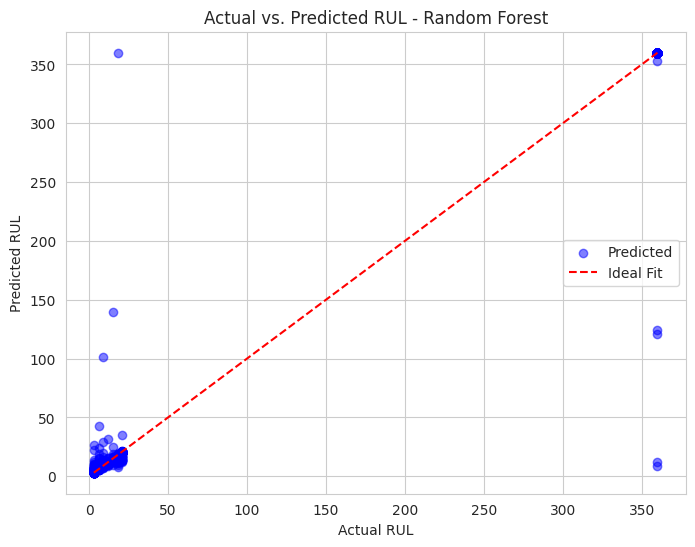

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(test_y, pred_y, color="blue", alpha=0.5, label="Predicted")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL - Random Forest")
plt.legend()
plt.show()

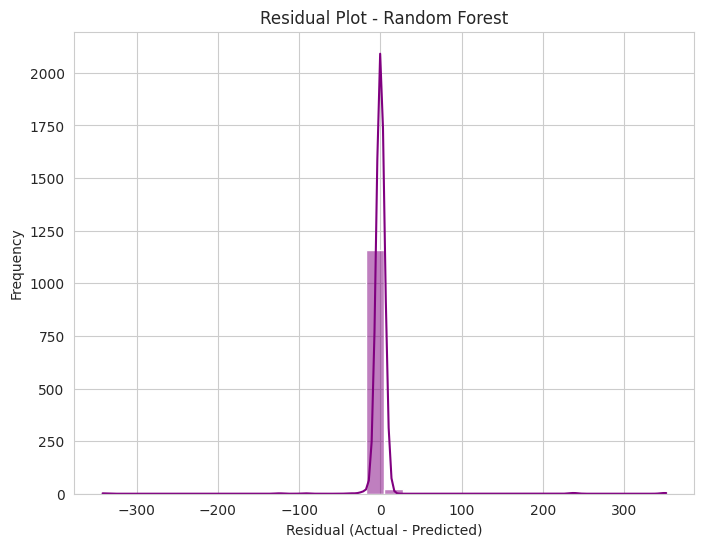

In [ ]:
# Calculate residuals
residuals = test_y - pred_y

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Plot - Random Forest")
plt.show()

In [ ]:
sample_input = {
    'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
    'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
    'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
    'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
    'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
    'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
    'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,  # One-hot encoded 'model'
    'age': 18
}

# Convert input to DataFrame
input_df = pd.DataFrame([sample_input])
# Define numerical features (assuming these are the ones you want to scale)
numerical_features = ['voltmean_3h', 'rotatemean_3h', 'pressuremean_3h', 'vibrationmean_3h',
                      'voltsd_3h', 'rotatesd_3h', 'pressuresd_3h', 'vibrationsd_3h',
                      'voltmean_24h', 'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h',
                      'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h',
                      'error1count', 'error2count', 'error3count', 'error4count', 'error5count',
                      'comp1', 'comp2', 'comp3', 'comp4', 'age',
                      'model_model1', 'model_model2', 'model_model3', 'model_model4']


# Normalize input using the same scaler
input_df[numerical_features] = scaler.transform(input_df[numerical_features])

# Ensure the input matches the training features
input_df = input_df[train_X.columns]

# Predict RUL
predicted_rul = rf_model_rul_2.predict(input_df)

print(f"🚀 Predicted Remaining Useful Life (RUL): {predicted_rul[0]:.2f} hours")

🚀 Predicted Remaining Useful Life (RUL): 18.93 hours


In [ ]:
import xgboost as xgb

In [ ]:
# Select feature columns (excluding RUL and failure)
feature_cols = [col for col in df2.columns if col not in ['machineID', 'datetime', 'RUL', 'failure']]

# Define X (features) and y (target)
X = pd.get_dummies(df2[feature_cols])
y = df2['RUL']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and testing sets (80% train, 20% test)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define XGBoost model
xgb_model_rul = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error for regression
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=4,  # Maximum depth of each tree
    subsample=0.8,  # Fraction of samples per tree
    colsample_bytree=0.8,  # Fraction of features per tree
    random_state=42
)

# Train the model
xgb_model_rul.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
pred_y = xgb_model_rul.predict(test_X)

In [ ]:
# Compute evaluation metrics
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

# Print the evaluation metrics
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

📌 Mean Absolute Error (MAE): 5.05
📌 Mean Squared Error (MSE): 597.39
📌 Root Mean Squared Error (RMSE): 24.44
📌 R² Score: 0.9624


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500, 800, 1000],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 6, 8, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'min_child_weight': [1, 3, 5],
#     'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization
#     'reg_lambda': [0, 0.1, 0.5, 1.0]  # L2 regularization
# }

In [ ]:
# # Initialize base model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Perform Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of different combinations to try
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_squared_error',
#     verbose=2,
#     n_jobs=-1
# )

# # Fit the model to training data
# random_search.fit(train_X, train_y)

In [ ]:
# # Print the best parameters
# print("Best Hyperparameters:", random_search.best_params_)

In [ ]:
# # Use best estimator for final model
# best_xgb = random_search.best_estimator_

# # Evaluate on test set
# pred_y = best_xgb.predict(test_X)

In [ ]:
# # Compute evaluation metrics
# mae = mean_absolute_error(test_y, pred_y)
# mse = mean_squared_error(test_y, pred_y)
# rmse = np.sqrt(mse)
# r2 = r2_score(test_y, pred_y)

# # Print the evaluation metrics
# print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
# print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
# print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"📌 R² Score: {r2:.4f}")

In [ ]:
# Define the best model
best_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=1.0,
    reg_alpha=0.1,
    n_estimators=300,
    min_child_weight=5,
    max_depth=10,
    learning_rate=0.1,
    gamma=0.2,
    colsample_bytree=1.0,
    random_state=42
)

# Train the model
best_xgb_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
pred_y = best_xgb_model.predict(test_X)

In [ ]:
# Compute evaluation metrics
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

# Print the evaluation metrics
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

📌 Mean Absolute Error (MAE): 3.85
📌 Mean Squared Error (MSE): 464.56
📌 Root Mean Squared Error (RMSE): 21.55
📌 R² Score: 0.9708


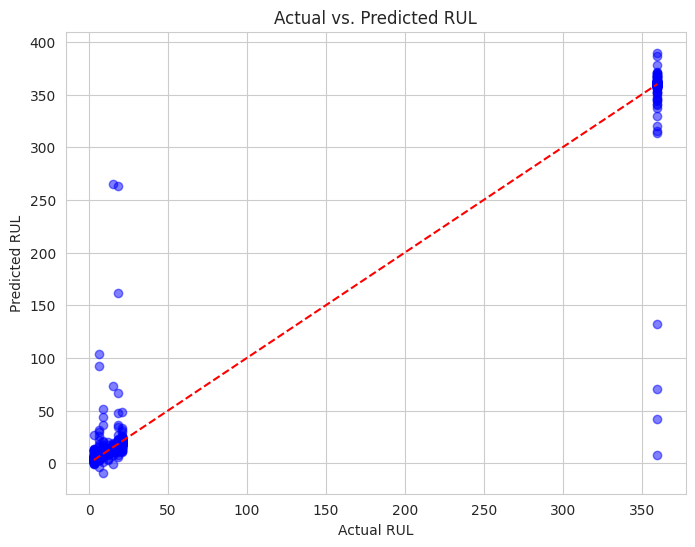

In [ ]:
# Actual vs. Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(test_y, pred_y, color="blue", alpha=0.5)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color="red", linestyle="--")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL")
plt.show()

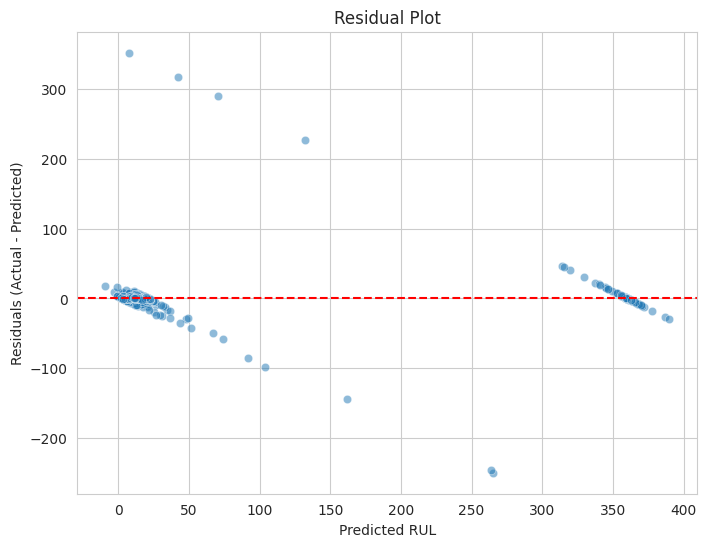

In [ ]:
# Residual Plot
residuals = test_y - pred_y
plt.figure(figsize=(8,6))
sns.scatterplot(x=pred_y, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

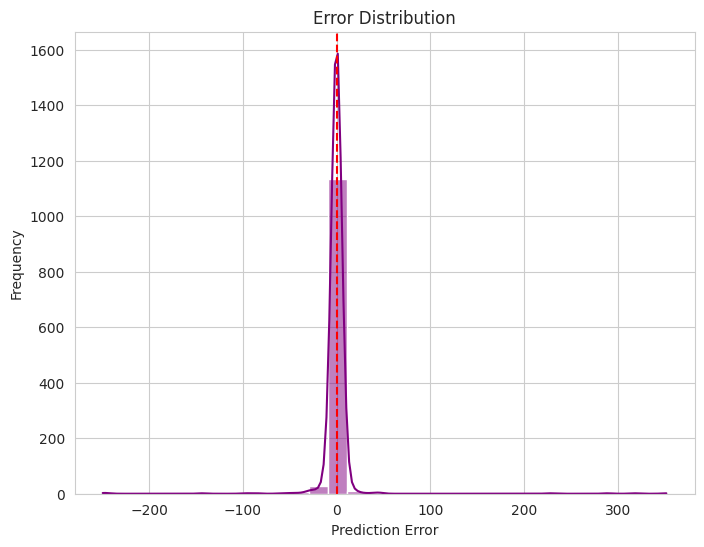

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

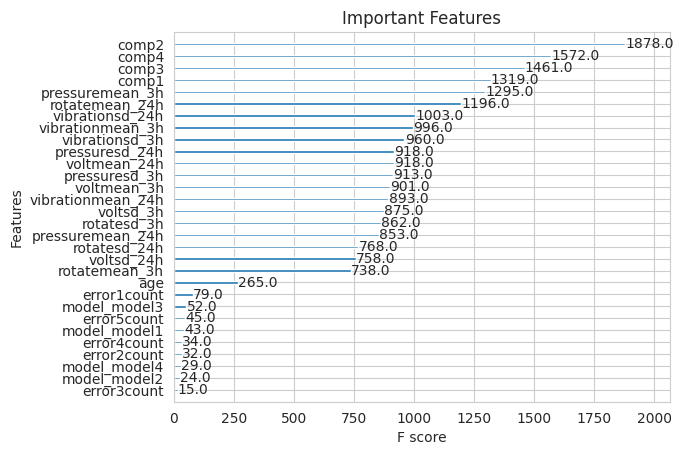

In [ ]:
# Feature Importance Plot
xgb.plot_importance(best_xgb_model, importance_type="weight", max_num_features=None)
plt.title("Important Features")
plt.show()

In [ ]:
# Sample Input
sample_input = {
    'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
    'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
    'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
    'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
    'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
    'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
    'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,  # One-hot encoded 'model'
    'age': 18
}

# Convert dictionary to DataFrame
input_df = pd.DataFrame([sample_input])

# Ensure input matches training features
input_df = input_df[final_train_X.columns]

# 🔹 Step 1: Predict Failure
failure_prediction = rf_model.predict(input_df)

if failure_prediction[0] == 1:
    print("⚠️ Failure is predicted!")

    # 🔹 Step 2: Predict RUL if failure is detected
    input_df[numerical_features] = scaler.transform(input_df[numerical_features])
    input_df = input_df[train_X.columns]  # Ensure correct feature alignment

    predicted_rul = rf_model_rul_2.predict(input_df)

    print(f"🛠️ Predicted Remaining Useful Life (RUL): {predicted_rul[0]:.2f} hours")
else:
    print("✅ No failure detected.")


⚠️ Failure is predicted!
🛠️ Predicted Remaining Useful Life (RUL): 18.93 hours


In [ ]:
# Define multiple input samples as a list of dictionaries
sample_inputs = [
    {
        'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
        'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
        'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
        'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
        'voltmean_3h': 157.347716, 'rotatemean_3h': 451.882075, 'pressuremean_3h': 101.28938, 'vibrationmean_3h': 48.602686,
        'voltsd_3h': 24.617739, 'rotatesd_3h': 28.950883, 'pressuresd_3h': 9.966729, 'vibrationsd_3h': 2.356486,
        'voltmean_24h': 171.566669, 'rotatemean_24h': 457.893518, 'pressuremean_24h': 100.708151, 'vibrationmean_24h': 44.993232,
        'voltsd_24h': 13.583969, 'rotatesd_24h': 33.790685, 'pressuresd_24h': 11.447426, 'vibrationsd_24h': 7.244618,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 22.375, 'comp2': 217.375, 'comp3': 157.375, 'comp4': 172.375,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
        'voltmean_3h': 167.430885, 'rotatemean_3h': 484.807784, 'pressuremean_3h': 102.232289, 'vibrationmean_3h': 43.287968,
        'voltsd_3h': 23.443744, 'rotatesd_3h': 37.05914, 'pressuresd_3h': 6.851679, 'vibrationsd_3h': 3.910358,
        'voltmean_24h': 170.791077, 'rotatemean_24h': 458.38685, 'pressuremean_24h': 101.146683, 'vibrationmean_24h': 48.05732,
        'voltsd_24h': 12.351025, 'rotatesd_24h': 44.585284, 'pressuresd_24h': 11.538897, 'vibrationsd_24h': 6.569257,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 0.75, 'comp2': 218.75, 'comp3': 158.75, 'comp4': 0.75,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    }
]

# Convert input data to DataFrame and ensure it has the correct column order
input_df = pd.DataFrame(sample_inputs)  # sample_inputs should be a list of dictionaries
input_df = input_df[final_train_X.columns]  # Ensure the feature order matches training data

# Predict failure
failure_predictions = xgb_model.predict(input_df)

# If failure is detected, predict RUL
for i, failure in enumerate(failure_predictions):
    print(f"Machine {i+1}: ", end="")
    if failure == 1:
        print("Failure is predicted!")

        # Normalize input using the same scaler
        input_df_scaled = input_df.copy()
        input_df_scaled[numerical_features] = scaler.transform(input_df_scaled[numerical_features])

        # Ensure feature alignment
        input_df_scaled = input_df_scaled[train_X.columns]

        # Predict RUL
        predicted_rul = rf_model_rul_2.predict(input_df_scaled.iloc[[i]])
        print(f"Predicted Remaining Useful Life (RUL): {predicted_rul[0]:.2f} hours\n")
    else:
        print("No failure detected.\n")


Machine 1: Failure is predicted!
Predicted Remaining Useful Life (RUL): 18.93 hours

Machine 2: Failure is predicted!
Predicted Remaining Useful Life (RUL): 15.18 hours

Machine 3: No failure detected.



Machine 1: Failure is predicted!
Predicted Remaining Useful Life (RUL): 18.93 hours

Machine 2: Failure is predicted!
Predicted Remaining Useful Life (RUL): 15.18 hours

Machine 3: No failure detected.


### Maintenance Scheduling ###
 Machine_ID  Failure_Predicted   RUL  Maintenance Category
          2                  1 15.18 Scheduled Maintenance
          1                  1 18.93 Scheduled Maintenance
          3                  0   NaN      Routine Check-up


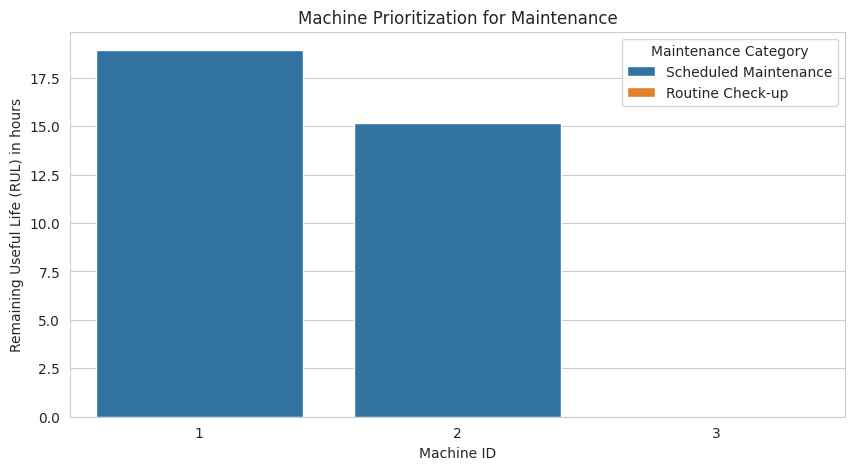

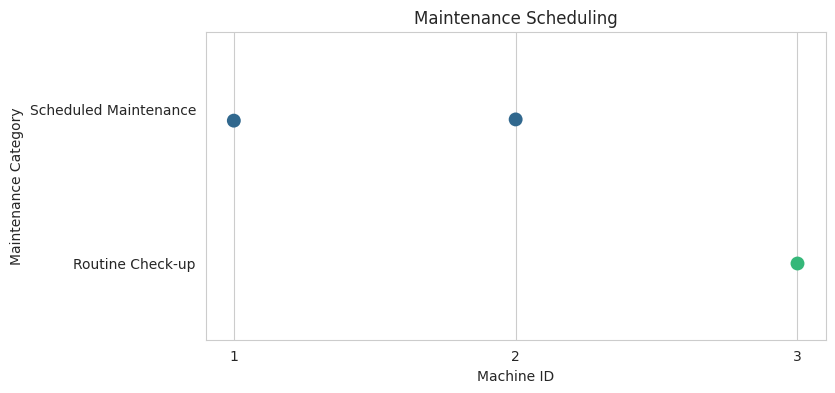

In [ ]:
# Define multiple input samples as a list of dictionaries
sample_inputs = [
    {
        'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
        'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
        'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
        'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
        'voltmean_3h': 157.347716, 'rotatemean_3h': 451.882075, 'pressuremean_3h': 101.28938, 'vibrationmean_3h': 48.602686,
        'voltsd_3h': 24.617739, 'rotatesd_3h': 28.950883, 'pressuresd_3h': 9.966729, 'vibrationsd_3h': 2.356486,
        'voltmean_24h': 171.566669, 'rotatemean_24h': 457.893518, 'pressuremean_24h': 100.708151, 'vibrationmean_24h': 44.993232,
        'voltsd_24h': 13.583969, 'rotatesd_24h': 33.790685, 'pressuresd_24h': 11.447426, 'vibrationsd_24h': 7.244618,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 22.375, 'comp2': 217.375, 'comp3': 157.375, 'comp4': 172.375,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
        'voltmean_3h': 167.430885, 'rotatemean_3h': 484.807784, 'pressuremean_3h': 102.232289, 'vibrationmean_3h': 43.287968,
        'voltsd_3h': 23.443744, 'rotatesd_3h': 37.05914, 'pressuresd_3h': 6.851679, 'vibrationsd_3h': 3.910358,
        'voltmean_24h': 170.791077, 'rotatemean_24h': 458.38685, 'pressuremean_24h': 101.146683, 'vibrationmean_24h': 48.05732,
        'voltsd_24h': 12.351025, 'rotatesd_24h': 44.585284, 'pressuresd_24h': 11.538897, 'vibrationsd_24h': 6.569257,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 0.75, 'comp2': 218.75, 'comp3': 158.75, 'comp4': 0.75,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    }
]

# Convert input data to DataFrame
input_df = pd.DataFrame(sample_inputs)
input_df = input_df[final_train_X.columns]  # Ensure feature order matches training data

# Predict failure
failure_predictions = xgb_model.predict(input_df)

# Store results in a DataFrame
results = []
for i, failure in enumerate(failure_predictions):
    print(f"Machine {i+1}: ", end="")
    machine_info = {'Machine_ID': i+1, 'Failure_Predicted': failure}

    if failure == 1:
        print("Failure is predicted!")

        # Normalize input using the same scaler
        input_df_scaled = input_df.copy()
        input_df_scaled[numerical_features] = scaler.transform(input_df_scaled[numerical_features])

        # Predict RUL
        predicted_rul = rf_model_rul_2.predict(input_df_scaled.iloc[[i]])[0]
        machine_info['RUL'] = predicted_rul
        print(f"Predicted Remaining Useful Life (RUL): {predicted_rul:.2f} hours\n")
    else:
        print("No failure detected.\n")
        machine_info['RUL'] = None

    results.append(machine_info)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Categorize maintenance requirements
def maintenance_category(rul):
    if rul is None:
        return "No Action Needed"
    elif rul < 10:
        return "Immediate Maintenance"
    elif rul < 20:
        return "Scheduled Maintenance"
    else:
        return "Routine Check-up"

results_df['Maintenance Category'] = results_df['RUL'].apply(maintenance_category)

# Sort by RUL (lower RUL = higher priority)
results_df = results_df.sort_values(by='RUL', ascending=True, na_position='last')

# Display maintenance schedule
print("\n### Maintenance Scheduling ###")
print(results_df.to_string(index=False))

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Machine_ID', y='RUL', hue='Maintenance Category', data=results_df, dodge=False)
plt.xlabel("Machine ID")
plt.ylabel("Remaining Useful Life (RUL) in hours")
plt.title("Machine Prioritization for Maintenance")
plt.legend(title="Maintenance Category")
plt.show()

# Visualization: Maintenance Category Timeline
plt.figure(figsize=(8, 4))
ax = sns.stripplot(
    x='Machine_ID',
    y='Maintenance Category',
    data=results_df,
    size=10,
    jitter=True,
    hue='Maintenance Category',
    palette='viridis',
    legend=False
)

# Ensure Machine ID ticks are whole numbers
ax.set_xticks(sorted(results_df["Machine_ID"].astype(int).unique()))
ax.set_xticklabels(sorted(results_df["Machine_ID"].astype(int).unique()))

plt.xlabel('Machine ID')
plt.ylabel('Maintenance Category')
plt.title('Maintenance Scheduling')

plt.show()


Machine 1: Failure is predicted!
Predicted Remaining Useful Life (RUL): 18.93 hours

Machine 2: Failure is predicted!
Predicted Remaining Useful Life (RUL): 15.18 hours

Machine 3: No failure detected.

Machine 4: No failure detected.

Machine 5: Failure is predicted!
Predicted Remaining Useful Life (RUL): 18.00 hours

Machine 6: No failure detected.

Machine 7: Failure is predicted!
Predicted Remaining Useful Life (RUL): 4.71 hours

Machine 8: Failure is predicted!
Predicted Remaining Useful Life (RUL): 360.00 hours

Machine 9: No failure detected.

Machine 10: Failure is predicted!
Predicted Remaining Useful Life (RUL): 7.11 hours

Machine 11: Failure is predicted!
Predicted Remaining Useful Life (RUL): 11.76 hours


### Maintenance Scheduling ###
 Machine_ID  Failure_Predicted    RUL  Maintenance Category
          7                  1   4.71 Immediate Maintenance
         10                  1   7.11 Immediate Maintenance
         11                  1  11.76 Immediate Maintenance


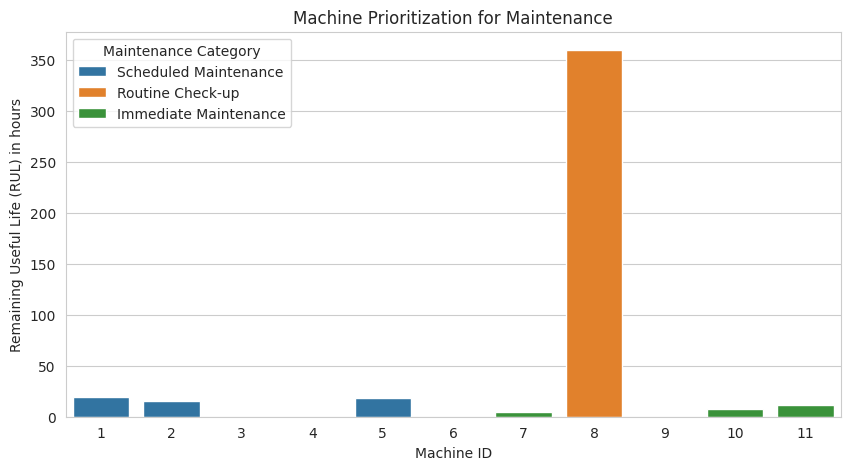

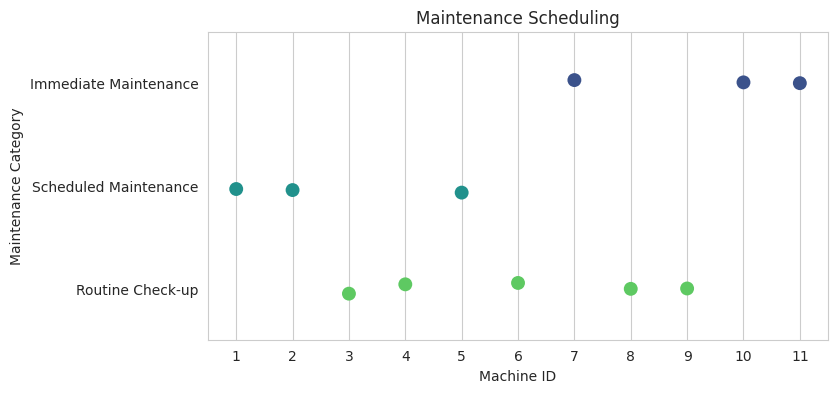

In [ ]:
# Define multiple input samples as a list of dictionaries
sample_inputs = [
    {
        'voltmean_3h': 166.281848, 'rotatemean_3h': 453.787824, 'pressuremean_3h': 106.187582, 'vibrationmean_3h': 51.99008,
        'voltsd_3h': 24.276228, 'rotatesd_3h': 23.621315, 'pressuresd_3h': 11.176731, 'vibrationsd_3h': 3.394073,
        'voltmean_24h': 171.069056, 'rotatemean_24h': 457.285237, 'pressuremean_24h': 101.011726, 'vibrationmean_24h': 44.148324,
        'voltsd_24h': 13.741098, 'rotatesd_24h': 41.038218, 'pressuresd_24h': 11.521602, 'vibrationsd_24h': 6.9295,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 22.125, 'comp2': 217.125, 'comp3': 157.125, 'comp4': 172.125,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
        'voltmean_3h': 157.347716, 'rotatemean_3h': 451.882075, 'pressuremean_3h': 101.28938, 'vibrationmean_3h': 48.602686,
        'voltsd_3h': 24.617739, 'rotatesd_3h': 28.950883, 'pressuresd_3h': 9.966729, 'vibrationsd_3h': 2.356486,
        'voltmean_24h': 171.566669, 'rotatemean_24h': 457.893518, 'pressuremean_24h': 100.708151, 'vibrationmean_24h': 44.993232,
        'voltsd_24h': 13.583969, 'rotatesd_24h': 33.790685, 'pressuresd_24h': 11.447426, 'vibrationsd_24h': 7.244618,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 22.375, 'comp2': 217.375, 'comp3': 157.375, 'comp4': 172.375,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
        'voltmean_3h': 167.430885, 'rotatemean_3h': 484.807784, 'pressuremean_3h': 102.232289, 'vibrationmean_3h': 43.287968,
        'voltsd_3h': 23.443744, 'rotatesd_3h': 37.05914, 'pressuresd_3h': 6.851679, 'vibrationsd_3h': 3.910358,
        'voltmean_24h': 170.791077, 'rotatemean_24h': 458.38685, 'pressuremean_24h': 101.146683, 'vibrationmean_24h': 48.05732,
        'voltsd_24h': 12.351025, 'rotatesd_24h': 44.585284, 'pressuresd_24h': 11.538897, 'vibrationsd_24h': 6.569257,
        'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 1,
        'comp1': 0.75, 'comp2': 218.75, 'comp3': 158.75, 'comp4': 0.75,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 18
    },
    {
    'voltmean_3h': 169.506966, 'rotatemean_3h': 376.835182, 'pressuremean_3h': 103.858675, 'vibrationmean_3h': 38.65137,
    'voltsd_3h': 8.005316, 'rotatesd_3h': 84.309705, 'pressuresd_3h': 6.537966, 'vibrationsd_3h': 4.915873,
    'voltmean_24h': 174.391706, 'rotatemean_24h': 465.447856, 'pressuremean_24h': 103.723502, 'vibrationmean_24h': 40.895266,
    'voltsd_24h': 14.118406, 'rotatesd_24h': 35.833625, 'pressuresd_24h': 10.381625, 'vibrationsd_24h': 6.415204,
    'error1count': 0, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 0,
    'comp1': 11.375, 'comp2': 229.375, 'comp3': 169.375, 'comp4': 11.375,
    'model_model1': 0, 'model_model2': 0, 'model_model3': 1, 'model_model4': 0,
    'age': 18
    },

   {
    'voltmean_3h': 166.248251, 'rotatemean_3h': 414.891433, 'pressuremean_3h': 112.169814, 'vibrationmean_3h': 40.834426,
    'voltsd_3h': 16.884054, 'rotatesd_3h': 66.41053, 'pressuresd_3h': 3.451425, 'vibrationsd_3h': 4.680576,
    'voltmean_24h': 170.744363, 'rotatemean_24h': 422.327585, 'pressuremean_24h': 99.707824, 'vibrationmean_24h': 38.8846,
    'voltsd_24h': 14.118662, 'rotatesd_24h': 73.087684, 'pressuresd_24h': 8.8616, 'vibrationsd_24h': 5.050458,
    'error1count': 0.0, 'error2count': 0.5, 'error3count': 0.5, 'error4count': 0.0, 'error5count': 0.0,
    'comp1': 29.25, 'comp2': 322.25, 'comp3': 14.25, 'comp4': 74.25,
    'model_model1': 0, 'model_model3': 1, 'model_model4': 0,
    'age': 18,
    'failure': 1
    },

    {
        'voltmean_3h': 194.075044, 'rotatemean_3h': 354.935806, 'pressuremean_3h': 98.938486, 'vibrationmean_3h': 33.031944,
        'voltsd_3h': 2.906411, 'rotatesd_3h': 90.449459, 'pressuresd_3h': 15.431447, 'vibrationsd_3h': 2.679055,
        'voltmean_24h': 181.818441, 'rotatemean_24h': 407.268383, 'pressuremean_24h': 101.416419, 'vibrationmean_24h': 41.146465,
        'voltsd_24h': 17.362512, 'rotatesd_24h': 81.304468, 'pressuresd_24h': 9.463399, 'vibrationsd_24h': 5.437627,
        'error1count': 0.333333, 'error2count': 0.333333, 'error3count': 0.333333, 'error4count': 0, 'error5count': 0,
        'comp1': 275.375, 'comp2': 215.375, 'comp3': 29.375, 'comp4': 14.375,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 0, 'model_model4': 1,
        'age': 7
    },
    {
    'voltmean_3h': 149.082619, 'rotatemean_3h': 412.180336, 'pressuremean_3h': 93.509785, 'vibrationmean_3h': 54.386079,
    'voltsd_3h': 19.075952, 'rotatesd_3h': 30.715081, 'pressuresd_3h': 3.090266, 'vibrationsd_3h': 6.53061,
    'voltmean_24h': 171.206225, 'rotatemean_24h': 448.104961, 'pressuremean_24h': 101.030466, 'vibrationmean_24h': 46.457982,
    'voltsd_24h': 13.262942, 'rotatesd_24h': 35.256704, 'pressuresd_24h': 11.589464, 'vibrationsd_24h': 7.790358,
    'error1count': 0.0, 'error2count': 0.0, 'error3count': 0.0, 'error4count': 0.0, 'error5count': 1.0,
    'comp1': 22.875, 'comp2': 217.875, 'comp3': 157.875, 'comp4': 172.875,
    'model_model1': 0, 'model_model3': 1, 'model_model4': 0,
    'age': 18
    }
,
    {
        'voltmean_3h': 186.910878, 'rotatemean_3h': 456.827182, 'pressuremean_3h': 98.66408, 'vibrationmean_3h': 37.436171,
        'voltsd_3h': 7.004529, 'rotatesd_3h': 43.308341, 'pressuresd_3h': 9.511889, 'vibrationsd_3h': 5.224192,
        'voltmean_24h': 181.439854, 'rotatemean_24h': 447.356875, 'pressuremean_24h': 100.561064, 'vibrationmean_24h': 41.114329,
        'voltsd_24h': 21.070758, 'rotatesd_24h': 57.404598, 'pressuresd_24h': 8.3656, 'vibrationsd_24h': 3.702357,
        'error1count': 1, 'error2count': 0, 'error3count': 0, 'error4count': 0, 'error5count': 0,
        'comp1': 0.0, 'comp2': 15.0, 'comp3': 75.0, 'comp4': 15.0,
        'model_model1': 0, 'model_model2': 0, 'model_model3': 0, 'model_model4': 1,
        'age': 7
    },
    {
        'voltmean_3h': 160.192689, 'rotatemean_3h': 362.67642, 'pressuremean_3h': 103.563121, 'vibrationmean_3h': 37.537568,
        'voltsd_3h': 18.667538, 'rotatesd_3h': 16.737936, 'pressuresd_3h': 16.576456, 'vibrationsd_3h': 3.328066,
        'voltmean_24h': 170.636819, 'rotatemean_24h': 445.296824, 'pressuremean_24h': 100.16366, 'vibrationmean_24h': 37.955393,
        'voltsd_24h': 12.898457, 'rotatesd_24h': 56.280872, 'pressuresd_24h': 10.586829, 'vibrationsd_24h': 4.56965,
        'error1count': 0.0, 'error2count': 0.0, 'error3count': 0.0, 'error4count': 0.0, 'error5count': 0.0,
        'comp1': 13.375, 'comp2': 58.375, 'comp3': 28.375, 'comp4': 73.375,
        'model_model1': 1, 'model_model3': 0, 'model_model4': 0,
        'age': 17
    },
    {
        'voltmean_3h': 173.287821, 'rotatemean_3h': 505.117514, 'pressuremean_3h': 95.83802, 'vibrationmean_3h': 33.372125,
        'voltsd_3h': 3.142801, 'rotatesd_3h': 82.071483, 'pressuresd_3h': 22.859991, 'vibrationsd_3h': 4.979299,
        'voltmean_24h': 181.698212, 'rotatemean_24h': 452.693158, 'pressuremean_24h': 98.186643, 'vibrationmean_24h': 39.832031,
        'voltsd_24h': 19.131048, 'rotatesd_24h': 62.043194, 'pressuresd_24h': 9.464835, 'vibrationsd_24h': 5.696224,
        'error1count': 1.0, 'error2count': 0.0, 'error3count': 0.0, 'error4count': 0.0, 'error5count': 0.0,
        'comp1': 44.75, 'comp2': 44.75, 'comp3': 74.75, 'comp4': 194.75,
        'model_model1': 0, 'model_model3': 1, 'model_model4': 0,
        'age': 14
    },
    {
        'voltmean_3h': 222.107404, 'rotatemean_3h': 441.325277, 'pressuremean_3h': 97.173455, 'vibrationmean_3h': 53.053217,
        'voltsd_3h': 11.409028, 'rotatesd_3h': 36.102879, 'pressuresd_3h': 10.760497, 'vibrationsd_3h': 3.382611,
        'voltmean_24h': 184.151714, 'rotatemean_24h': 460.404693, 'pressuremean_24h': 99.960857, 'vibrationmean_24h': 45.582376,
        'voltsd_24h': 21.864149, 'rotatesd_24h': 50.012921, 'pressuresd_24h': 8.158514, 'vibrationsd_24h': 6.792218,
        'error1count': 2.0, 'error2count': 0.0, 'error3count': 0.0, 'error4count': 0.0, 'error5count': 0.0,
        'comp1': 74.5, 'comp2': 194.5, 'comp3': 29.5, 'comp4': 14.5,
        'model_model1': 0, 'model_model3': 0, 'model_model4': 1,
        'age': 1
    }

]

# Convert input data to DataFrame
input_df = pd.DataFrame(sample_inputs)
input_df = input_df[final_train_X.columns]  # Ensure feature order matches training data

# Predict failure
failure_predictions = xgb_model.predict(input_df)

# Store results in a DataFrame
results = []
for i, failure in enumerate(failure_predictions):
    print(f"Machine {i+1}: ", end="")
    machine_info = {'Machine_ID': i+1, 'Failure_Predicted': failure}

    if failure == 1:
        print("Failure is predicted!")

        # Normalize input using the same scaler
        input_df_scaled = input_df.copy()
        input_df_scaled[numerical_features] = scaler.transform(input_df_scaled[numerical_features])

        # Predict RUL
        predicted_rul = rf_model_rul_2.predict(input_df_scaled.iloc[[i]])[0]
        machine_info['RUL'] = predicted_rul
        print(f"Predicted Remaining Useful Life (RUL): {predicted_rul:.2f} hours\n")
    else:
        print("No failure detected.\n")
        machine_info['RUL'] = None

    results.append(machine_info)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Categorize maintenance requirements
def maintenance_category(rul):
    if rul is None:
        return "No Action Needed"
    elif rul < 12:
        return "Immediate Maintenance"
    elif rul < 20:
        return "Scheduled Maintenance"
    else:
        return "Routine Check-up"

results_df['Maintenance Category'] = results_df['RUL'].apply(maintenance_category)

# Sort by RUL (lower RUL = higher priority)
results_df = results_df.sort_values(by='RUL', ascending=True, na_position='last')

# Display maintenance schedule
print("\n### Maintenance Scheduling ###")
print(results_df.to_string(index=False))

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Machine_ID', y='RUL', hue='Maintenance Category', data=results_df, dodge=False)
plt.xlabel("Machine ID")
plt.ylabel("Remaining Useful Life (RUL) in hours")
plt.title("Machine Prioritization for Maintenance")
plt.legend(title="Maintenance Category")
plt.show()

# Visualization: Maintenance Category Timeline
plt.figure(figsize=(8, 4))
ax = sns.stripplot(
    x='Machine_ID',
    y='Maintenance Category',
    data=results_df,
    size=10,
    jitter=True,
    hue='Maintenance Category',
    palette='viridis',
    legend=False
)

# Ensure Machine ID ticks are whole numbers
ax.set_xticks(sorted(results_df["Machine_ID"].astype(int).unique()))
ax.set_xticklabels(sorted(results_df["Machine_ID"].astype(int).unique()))

plt.xlabel('Machine ID')
plt.ylabel('Maintenance Category')
plt.title('Maintenance Scheduling')

plt.show()
